# Summary of Model Results

In this notebook, we compile and summarize the results from five machine learning models trained to predict rogue wave behavior: Elastic Net, Random Forest, XGBoost, Feed-Forward Neural Network (FFNN), and Support Vector Machine (SVM). Each model was trained using the same preprocessed dataset and evaluated using a consistent set of performance metrics to ensure fair comparison.

The models differ in their underlying assumptions and mechanisms:
- Elastic Net is a linear regression model that combines L1 and L2 regularization. It is interpretable and suitable for datasets with multicollinearity, but limited in capturing non-linear patterns.
- Random Forest is an ensemble of decision trees that aggregates predictions to reduce overfitting. It handles non-linear relationships and interactions well, and is relatively robust with minimal parameter tuning.
- XGBoost (Extreme Gradient Boosting) is a more advanced tree-based model that builds trees sequentially to correct errors from previous iterations. It often achieves superior performance, especially on complex datasets, but requires careful hyperparameter tuning.
- Feed-Forward Neural Network (FFNN) is a deep learning model capable of learning complex non-linear relationships. While powerful, it is also more sensitive to overfitting and computationally expensive to train.
- Support Vector Machine (SVM) uses kernel functions to find optimal decision boundaries in high-dimensional feature space. It is particularly effective on smaller datasets with clear margins, but might scale poorly with large data.

By comparing their predictive performance and interpretability, we want to understand which modeling approach is most suitable for this task and what insights can be gained about rogue wave formation from the learned models.

**Imports**

In [1]:
import os
import sys
import zipfile
import requests
from tqdm import tqdm
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import shap

sys.path.append('./')
sys.path.append('../scripts/')
import utils

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 42

**Loading Model Performances**

In [3]:
dir_output = "../results/"
os.makedirs(dir_output, exist_ok=True)

Linear Model

In [4]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/linear_regression.zip"
# with open(f"{dir_output}/linear_regression.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/linear_regression.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [5]:
lm_model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/linear_regression/model_and_data.pickle", output=False)
lm_y_true_train, lm_y_pred_train, lm_mse_train, lm_mae_train, lm_r2_train, lm_spearman_r_train = utils.evaluate_best_regressor(lm_model, X_train, y_train, dataset="Train", plot=False)
lm_y_true_test, lm_y_pred_test, lm_mse_test, lm_mae_test, lm_r2_test, lm_spearman_r_test = utils.evaluate_best_regressor(lm_model, X_test, y_test, dataset="Test", plot=False)

Support Vector Machine Model

In [6]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/svm.zip"
# with open(f"{dir_output}/svm.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/svm.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [7]:
# Load and unpack the train and test predictions
with open("../results/svm/performance_train.pickle", "rb") as handle:
    performance_train = pickle.load(handle)

svm_y_true_train, svm_y_pred_train, svm_mse_train, svm_mae_train, svm_r2_train, svm_spearman_r_train = performance_train

with open("../results/svm/performance_test.pickle", "rb") as handle:
    performance_test = pickle.load(handle)

svm_y_true_test, svm_y_pred_test, svm_mse_test, svm_mae_test, svm_r2_test, svm_spearman_r_test = performance_test

Random Forest Model

In [8]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/random_forest.zip"
# with open(f"{dir_output}/random_forest.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/random_forest.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [9]:
rf_model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/random_forest/model_and_data.pickle", output=False)
rf_y_true_train, rf_y_pred_train, rf_mse_train, rf_mae_train, rf_r2_train, rf_spearman_r_train = utils.evaluate_best_regressor(rf_model, X_train, y_train, dataset="Train", plot=False)
rf_y_true_test, rf_y_pred_test, rf_mse_test, rf_mae_test, rf_r2_test, rf_spearman_r_test = utils.evaluate_best_regressor(rf_model, X_test, y_test, dataset="Test", plot=False)

Loaded the following model: RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', max_samples=0.5, random_state=42) with an average tree depth of : 30.0


XG Boost Model

In [10]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/xg_boost.zip"
# with open(f"{dir_output}/xg_boost.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/xg_boost.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [11]:
xgb_model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/xg_boost/model_and_data.pickle", output=False)
xgb_y_true_train, xgb_y_pred_train, xgb_mse_train, xgb_mae_train, xgb_r2_train, xgb_spearman_r_train = utils.evaluate_best_regressor(xgb_model, X_train, y_train, dataset="Train", plot=False)
xgb_y_true_test, xgb_y_pred_test, xgb_mse_test, xgb_mae_test, xgb_r2_test, xgb_spearman_r_test = utils.evaluate_best_regressor(xgb_model, X_test, y_test, dataset="Test", plot=False)

Feed Foreward Neural Network Model

In [12]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/ffnn.zip"
# with open(f"{dir_output}/ffnn.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/ffnn.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [13]:
ffnn_model, ffnn_X_train, ffnn_y_train, ffnn_y_train_cat, ffnn_X_test, ffnn_y_test, ffnn_y_test_cat = utils.load_data_and_model("../results/ffnn/model_and_data.pickle", output=False)
ffnn_y_true_train, ffnn_y_pred_train, ffnn_mse_train, ffnn_mae_train, ffnn_r2_train, ffnn_spearman_r_train = utils.evaluate_best_regressor(ffnn_model, ffnn_X_train, ffnn_y_train, dataset="Train", plot=False)
ffnn_y_true_test, ffnn_y_pred_test, ffnn_mse_test, ffnn_mae_test, ffnn_r2_test, ffnn_spearman_r_test = utils.evaluate_best_regressor(ffnn_model, ffnn_X_test, ffnn_y_test, dataset="Test", plot=False)

    1/26210 ━━━━━━━━━━━━━━━━━━━━ 1:45:51 242ms/step

2025-12-03 18:20:02.360030: I external/local_xla/xla/service/service.cc:163] XLA service 0x17fa87740 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-12-03 18:20:02.360047: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
2025-12-03 18:20:02.381791: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764782402.536701 6250741 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26210/26210 ━━━━━━━━━━━━━━━━━━━━ 11s 396us/step
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 3s 408us/step


**Assembling Model Performances**

In [14]:
train_scores = {
    'MSE': {'ElasticNet': lm_mse_train, 'SVM': svm_mse_train, 'Random Forest': rf_mse_train, 'XGBoost': xgb_mse_train, 'FFNN': ffnn_mse_train},
    'MAE': {'ElasticNet': lm_mae_train, 'SVM': svm_mae_train, 'Random Forest': rf_mae_train, 'XGBoost': xgb_mae_train, 'FFNN': ffnn_mae_train},
    'R2': {'ElasticNet': lm_r2_train, 'SVM': svm_r2_train, 'Random Forest': rf_r2_train, 'XGBoost': xgb_r2_train, 'FFNN': ffnn_r2_train},
    'SpearmanR': {'ElasticNet': lm_spearman_r_train, 'SVM': svm_spearman_r_train, 'Random Forest': rf_spearman_r_train, 'XGBoost': xgb_spearman_r_train, 'FFNN': ffnn_spearman_r_train}
}

test_scores = {
    'MSE': {'ElasticNet': lm_mse_test, 'SVM': svm_mse_test, 'Random Forest': rf_mse_test, 'XGBoost': xgb_mse_test, 'FFNN': ffnn_mse_test},
    'MAE': {'ElasticNet': lm_mae_test, 'SVM': svm_mae_test, 'Random Forest': rf_mae_test, 'XGBoost': xgb_mae_test, 'FFNN': ffnn_mae_test},
    'R2': {'ElasticNet': lm_r2_test, 'SVM': svm_r2_test, 'Random Forest': rf_r2_test, 'XGBoost': xgb_r2_test, 'FFNN': ffnn_r2_test},
    'SpearmanR': {'ElasticNet': lm_spearman_r_test, 'SVM': svm_spearman_r_test, 'Random Forest': rf_spearman_r_test, 'XGBoost': xgb_spearman_r_test, 'FFNN': ffnn_spearman_r_test}
}

In [15]:
# Define your inputs
models = ['ElasticNet', 'SVM', 'Random Forest', 'XGBoost', 'FFNN']
metrics = ['MSE', 'MAE', 'R2', 'SpearmanR']
datasets = {'Train': train_scores, 'Test': test_scores}

# Convert to long-form DataFrame
rows = []
for dataset_name, score_dict in datasets.items():
    for metric in metrics:
        for model in models:
            rows.append({
                'Model': model,
                'Dataset': dataset_name,
                'Metric': metric,
                'Performance': score_dict[metric][model]
            })

performances = pd.DataFrame(rows)

In [16]:
labels = {
    "ElasticNet": {
        "Train": (lm_y_true_train, lm_y_pred_train),
        "Test": (lm_y_true_test, lm_y_pred_test)
    },
    "SVM": {
        "Train": (svm_y_true_train, svm_y_pred_train),
        "Test": (svm_y_true_test, svm_y_pred_test)
    },
    "Random Forest": {
        "Train": (rf_y_true_train, rf_y_pred_train),
        "Test": (rf_y_true_test, rf_y_pred_test)
    },
    "XGBoost": {
        "Train": (xgb_y_true_train, xgb_y_pred_train),
        "Test": (xgb_y_true_test, xgb_y_pred_test)
    },
    "FFNN": {
        "Train": (ffnn_y_true_train, ffnn_y_pred_train),
        "Test": (ffnn_y_true_test, ffnn_y_pred_test)
    }
}

**Plotting Model Performances**

In [17]:
# Custom colors
custom_palette = {
    "Train": "#00adec",  
    "Test": "#ff6843"    
}

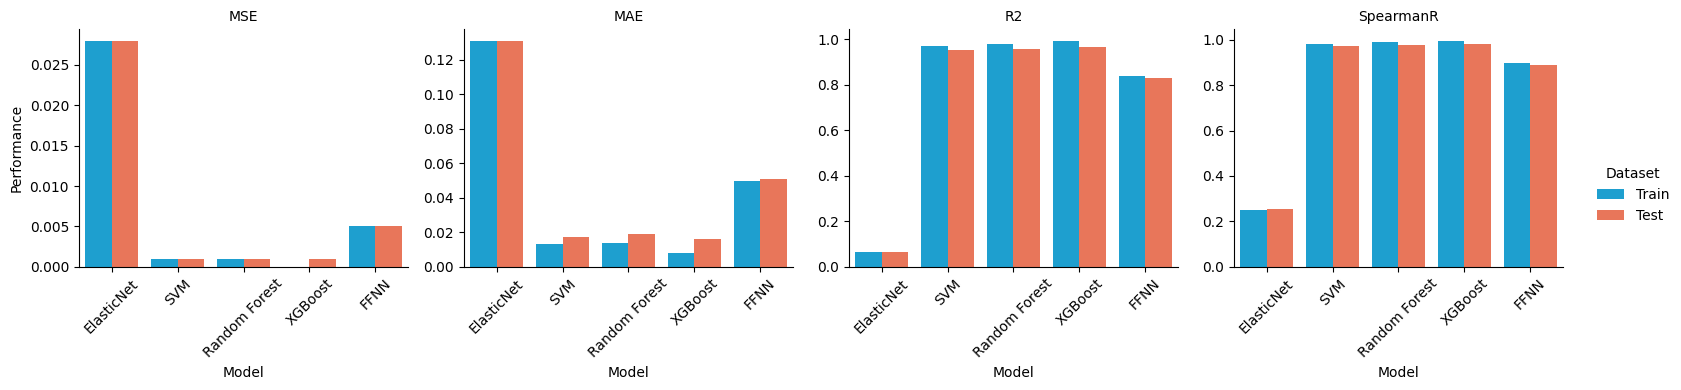

In [18]:
g = sns.catplot(
    data=performances,
    kind="bar",
    x="Model",
    y="Performance",
    hue="Dataset",
    col="Metric",
    palette=custom_palette,
    height=4,
    aspect=1,
    sharey=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Model", "Performance")
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()

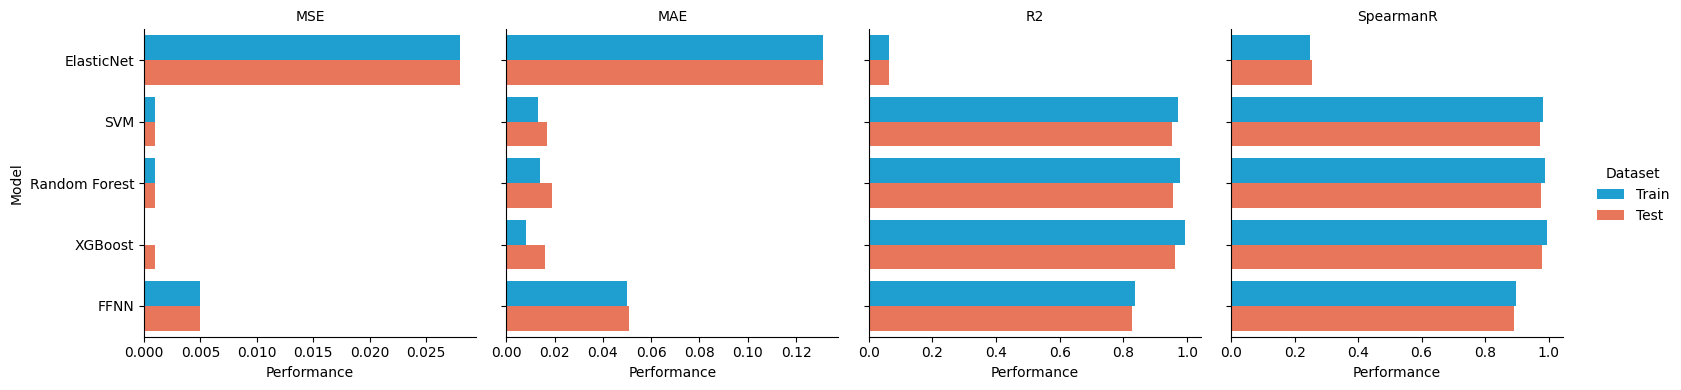

In [19]:
g = sns.catplot(
    data=performances,
    kind="bar",
    y="Model",
    x="Performance",
    hue="Dataset",
    col="Metric",
    palette=custom_palette,
    height=4,
    aspect=1,
    sharex=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Performance", "Model")
g.tight_layout()
plt.show()

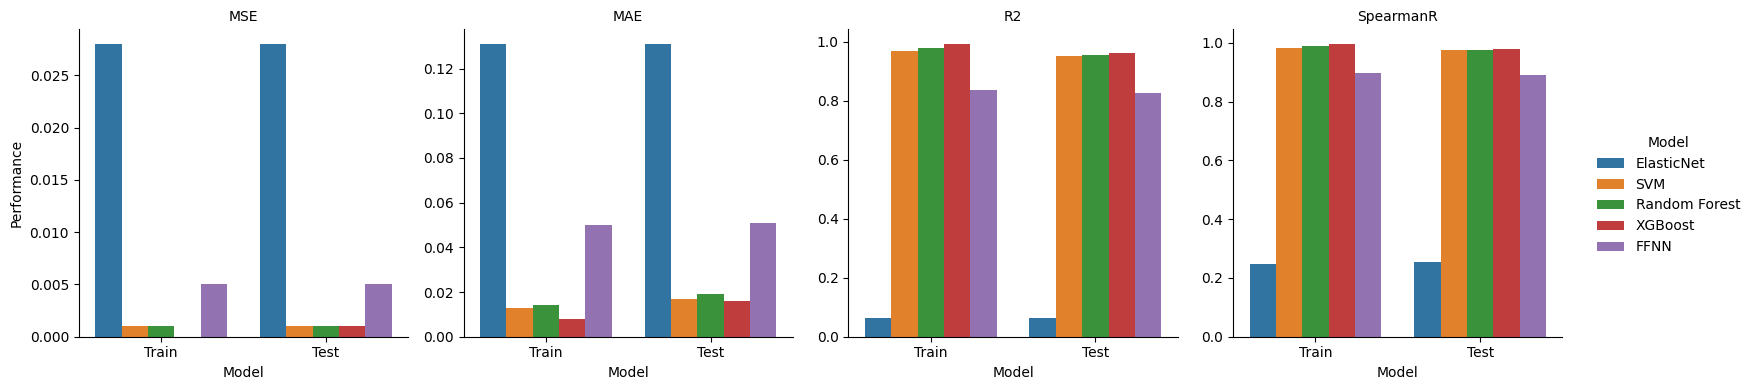

In [20]:
g = sns.catplot(
    data=performances,
    kind="bar",
    x="Dataset",
    y="Performance",
    hue="Model",
    col="Metric",
    palette=sns.color_palette(),
    height=4,
    aspect=1,
    sharey=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Model", "Performance")
#g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()

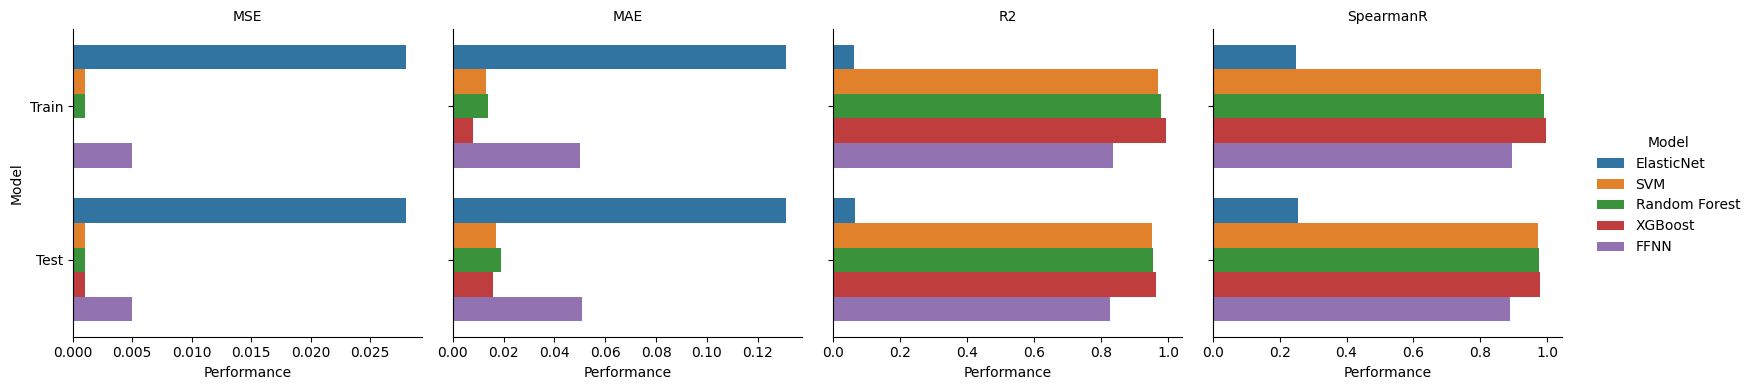

In [21]:
g = sns.catplot(
    data=performances,
    kind="bar",
    y="Dataset",
    x="Performance",
    hue="Model",
    col="Metric",
    palette=sns.color_palette(),
    height=4,
    aspect=1,
    sharex=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Performance", "Model")
g.tight_layout()
plt.show()

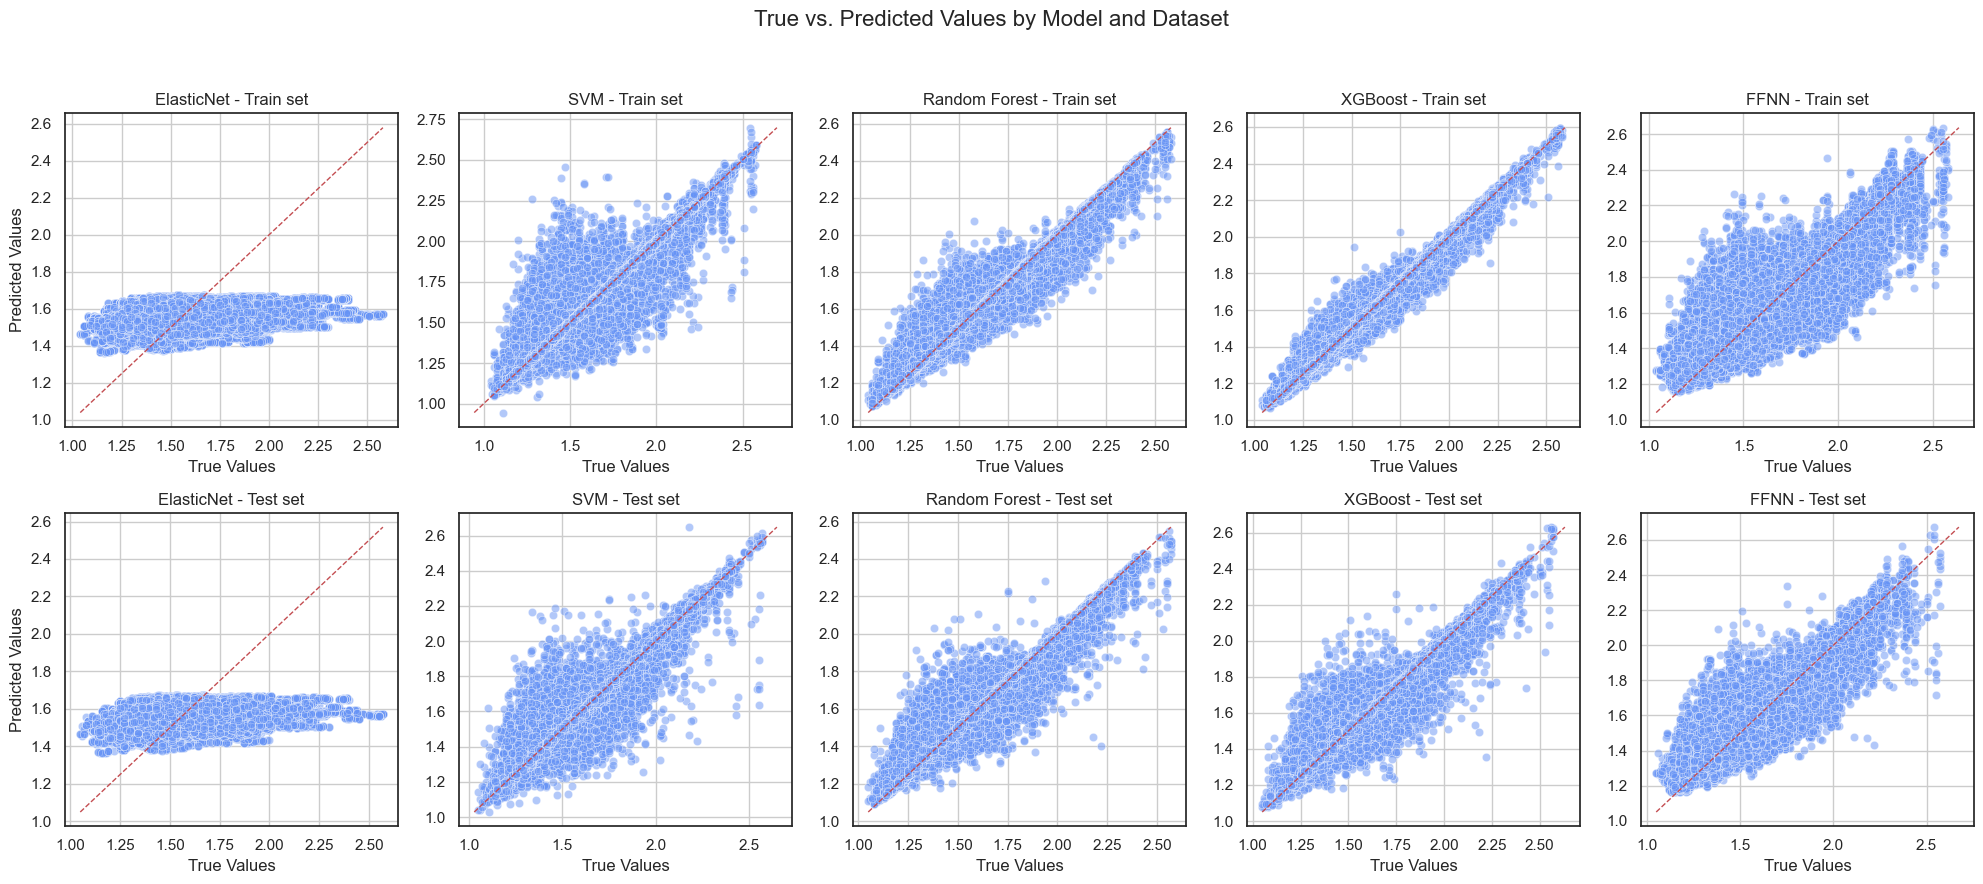

In [22]:
sns.set_theme(style="white")
n_models = len(models)

fig, axs = plt.subplots(2, n_models, figsize=(4 * n_models, 9), sharex=False, sharey=False)

for col, model in enumerate(models):
    for row, dataset in enumerate(["Train", "Test"]):
        y_true, y_pred = labels[model][dataset]
        y_true = np.ravel(y_true)
        y_pred = np.ravel(y_pred)

        ax = axs[row, col]
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, color="#6693F5", ax=ax)

        # Diagonal line
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], "r--", lw=1)

        # Labels
        ax.set_xlabel("True Values")
        if col == 0:
            ax.set_ylabel("Predicted Values")
        else:
            ax.set_ylabel("")
        ax.set_title(f"{model} - {dataset} set")
        ax.grid(True)

plt.suptitle("True vs. Predicted Values by Model and Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

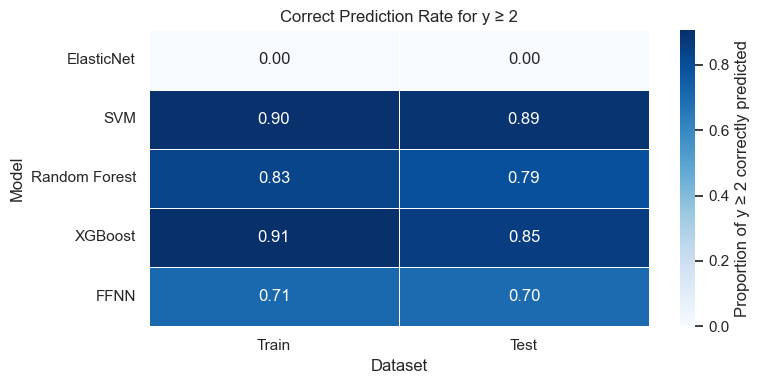

In [23]:
threshold = 2

# Compute heatmap data directly
heatmap_data = pd.DataFrame({
    model: {
        dataset: (
            np.sum(np.ravel(y_pred)[np.ravel(y_true) >= threshold] >= threshold) /
            np.sum(np.ravel(y_true) >= threshold)
        ) if np.sum(np.ravel(y_true) >= threshold) > 0 else np.nan
        for dataset, (y_true, y_pred) in sets.items()
    }
    for model, sets in labels.items()
}).T  # transpose so models are rows

# Reorder columns (optional)
heatmap_data = heatmap_data[['Train', 'Test']]

# Plot
plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={'label': f'Proportion of y ≥ {threshold} correctly predicted'}
)
plt.title(f"Correct Prediction Rate for y ≥ {threshold}")
plt.xlabel("Dataset")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

**Model Interpretation**

In [24]:
models = ["ElasticNet", "SVM", "Random Forest", "XGBoost", "FFNN"]

file_shap = f"../results/linear_regression/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_linear_regression = pickle.load(handle)

file_shap = f"../results/svm/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_svm = pickle.load(handle)

file_shap = f"../results/random_forest/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_random_forest = pickle.load(handle)

file_shap = f"../results/xg_boost/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_xgboost = pickle.load(handle)

file_shap = f"../results/ffnn/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_ffnn = pickle.load(handle)

explanations = [
    explanation_linear_regression,
    explanation_svm,
    explanation_random_forest,
    explanation_xgboost,
    explanation_ffnn
]

In [25]:
# 1. Choose a reference model for sorting (e.g., XGBoost)
ref_explanation = explanation_xgboost

# 2. Compute mean absolute SHAP values per feature
mean_abs_shap = np.abs(ref_explanation.values).mean(axis=0)

# 3. Get the sorted indices and feature names
feature_order = np.argsort(mean_abs_shap)[::-1]
sorted_feature_names = [ref_explanation.feature_names[i] for i in feature_order]

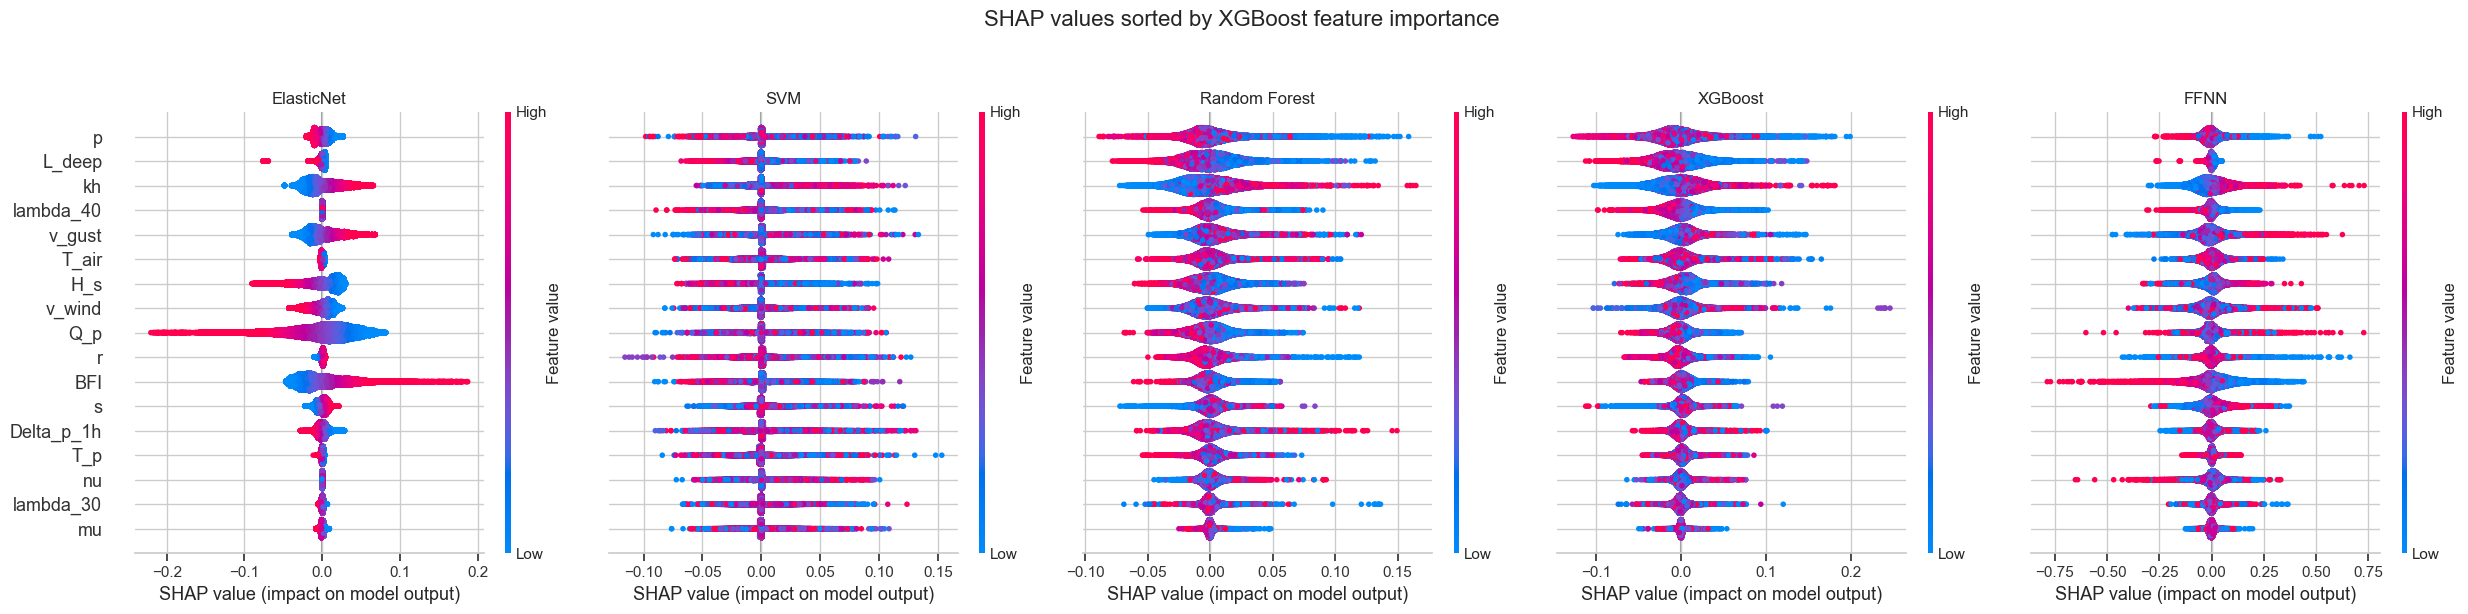

In [26]:
fig, axes = plt.subplots(1, len(explanations), figsize=(5 * len(explanations), 6), sharey=True)

for i, (expl, title) in enumerate(zip(explanations, models)):
    plt.sca(axes[i])
    shap.plots.beeswarm(expl, show=False, plot_size=None, order=feature_order, max_display=17)
    axes[i].set_title(title)

plt.suptitle("SHAP values sorted by XGBoost feature importance", fontsize=16, y=1.02)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

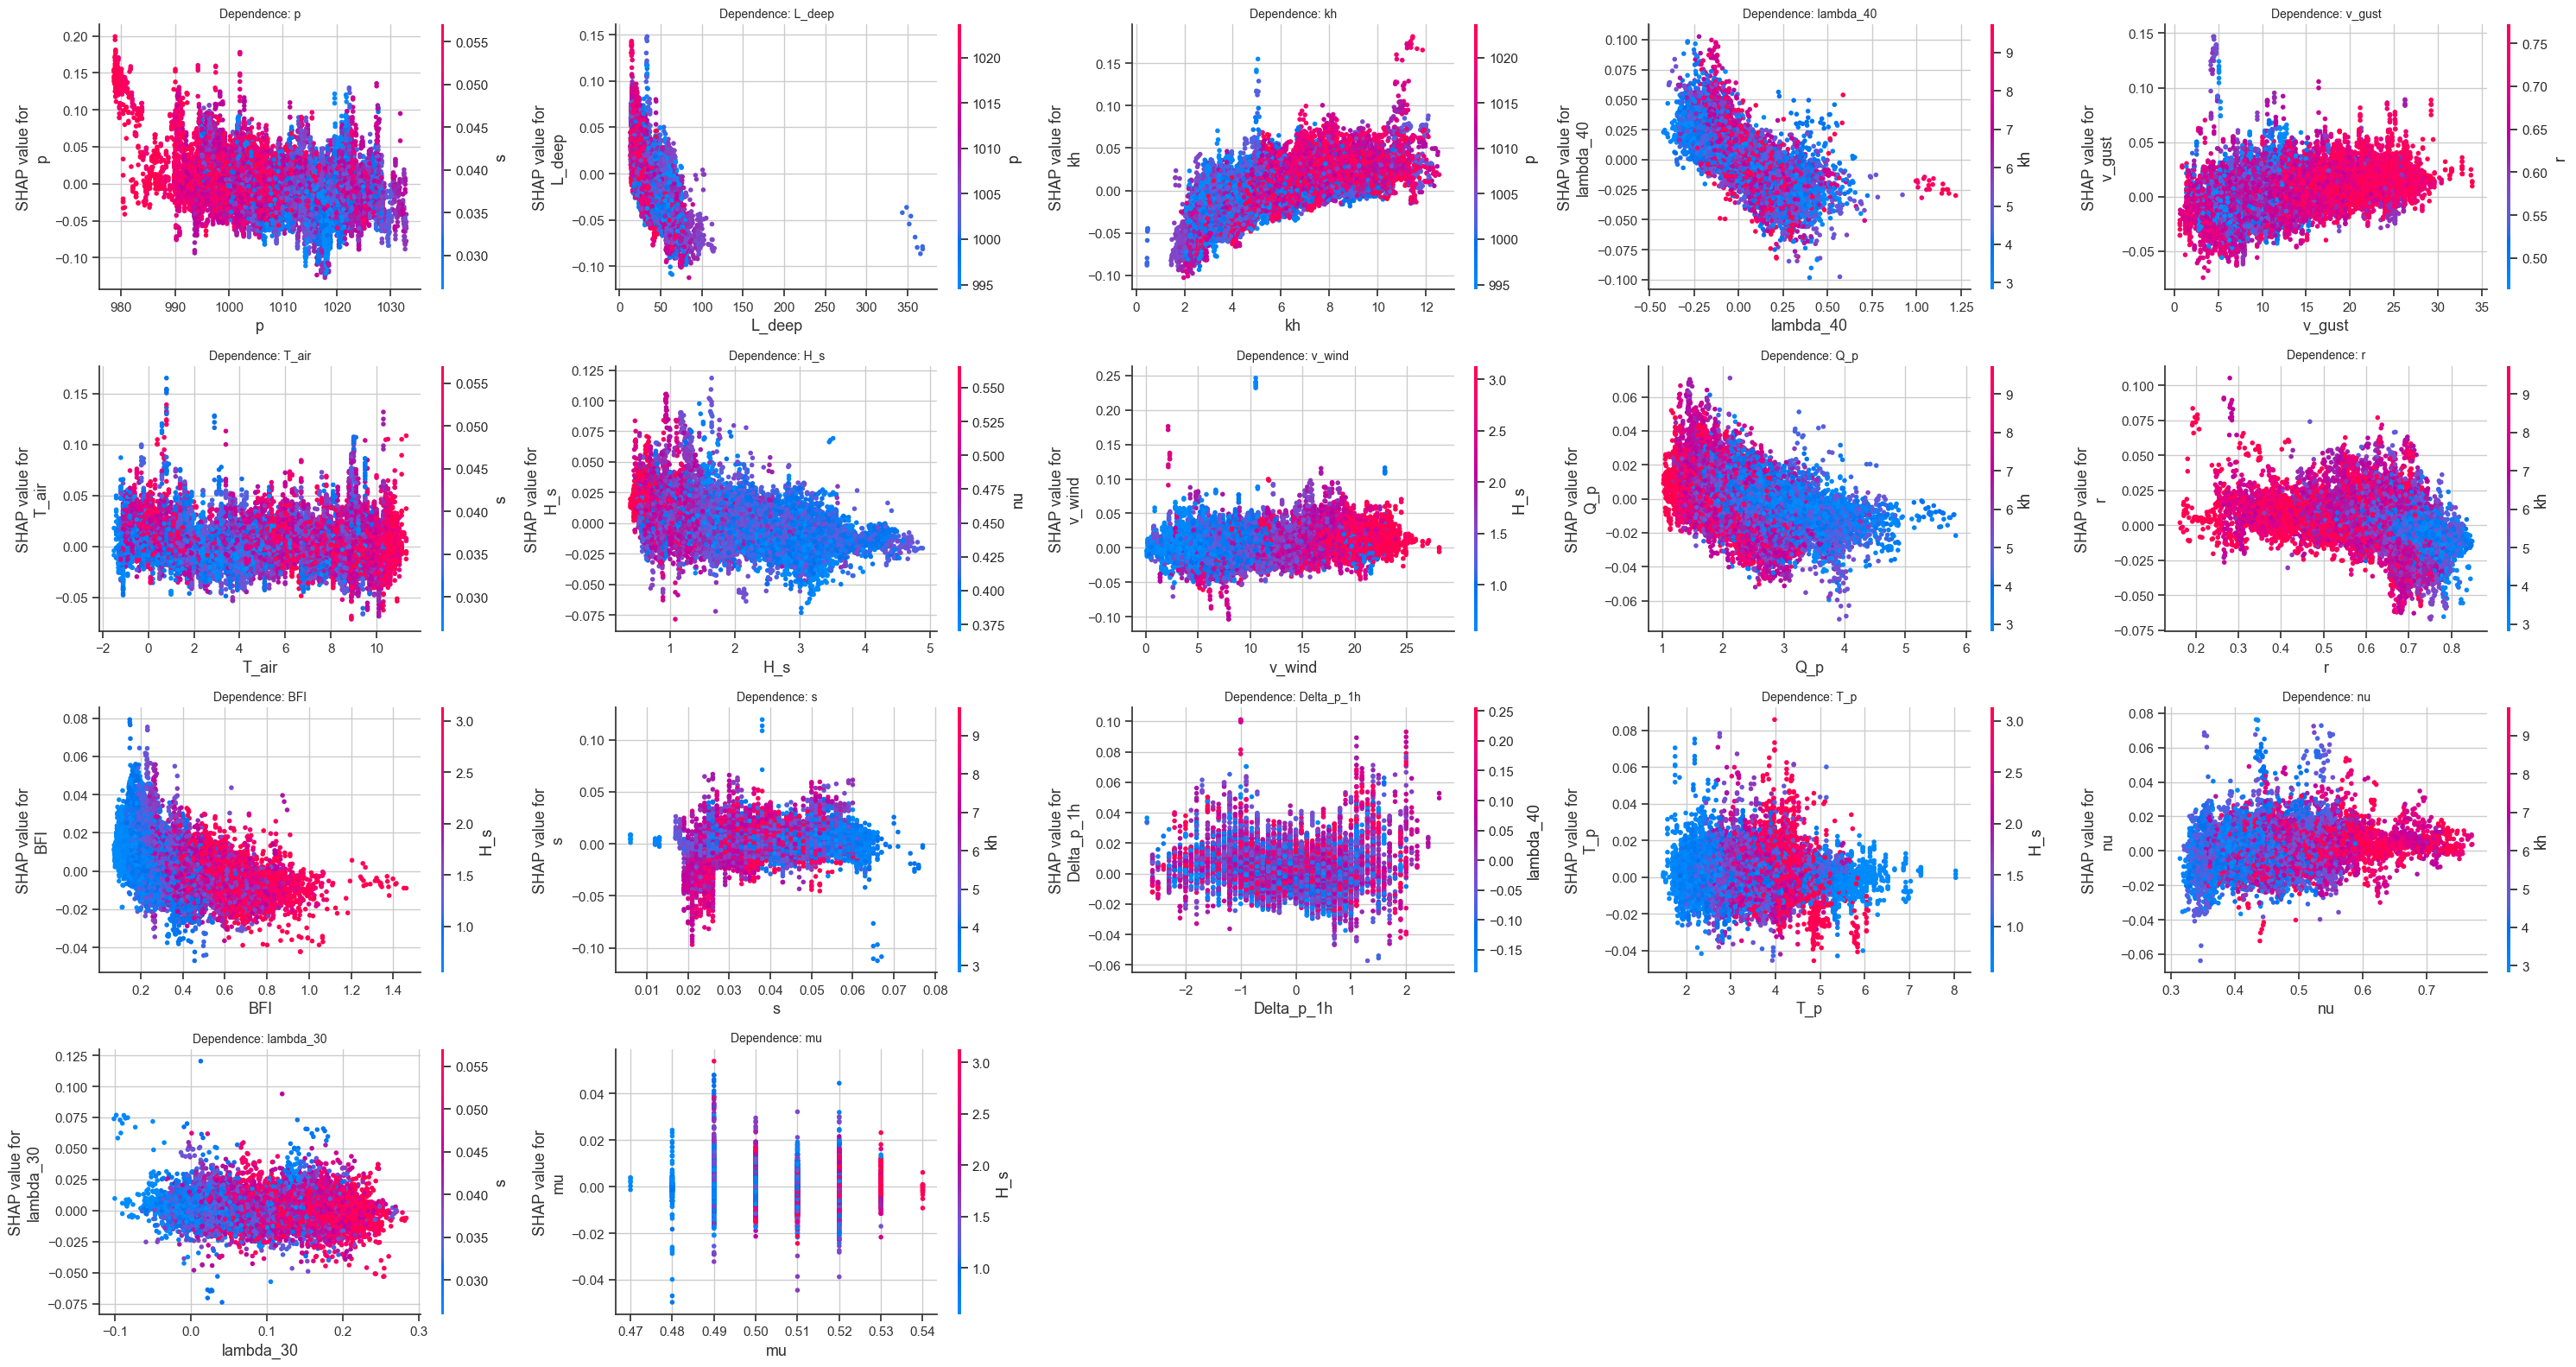

In [27]:
utils.plot_shap_dependence(explanation_xgboost, num_cols=5)

**Analysis of large FFNN SHAP values**

In contrast to the tree-based models, the feed-forward neural network (FFNN) produced substantially larger and highly variable SHAP feature attributions, which frequently appeared in opposing directions and cancelled each other out. This behaviour can be attributed to the combination of strong multicollinearity in the input variables and the flexibility of the FFNN architecture. Several predictors in our dataset exhibit correlations exceeding |ρ| ≈ 0.6–0.9, meaning that multiple features encode similar underlying physical factors. In such settings, a neural network is free to represent the same functional relationship through many mathematically equivalent but numerically unstable weight configurations. Consequently, the model distributes the predictive signal across correlated features using large positive and negative weights, leading to high-magnitude SHAP values that offset one another while still yielding accurate predictions. This also explains the butterfly-shaped SHAP dependence plots: for a given feature value, the attributed effect can be strongly positive or negative depending on the specific combination of correlated covariates present in the sample. Tree-based models, by contrast, impose stronger structural constraints through hierarchical feature splits, which tend to yield more stable, monotonic, and lower-magnitude SHAP attributions in the presence of correlated predictors. Thus, the unusually large and cancelling SHAP contributions observed for the FFNN reflect not a flaw in the explanation method, but the model’s tendency to adopt a complex and interaction-heavy representation in a collinear feature space.

In [28]:
# Define a background dataset for the SHAP analysis.
n_samples_background = 2000

data_test = ffnn_X_test.copy().assign(target=ffnn_y_test, target_class=ffnn_y_test_cat)
sample_sizes = data_test["target_class"].value_counts(normalize=True).mul(n_samples_background).round().astype(int)
data_background = pd.concat([group.sample(n=sample_sizes[cls], random_state=seed) for cls, group in data_test.groupby("target_class") if cls in sample_sizes])
data_background = data_background.drop(columns=["target", "target_class"])

*Sanity Check:* 

✅ Verify that SHAP values are computed correctly, i.e. SHAP values sum to prediction minus baseline. 

Conclusion: The sanity check confirms that SHAP values are computed correctly for the model, as the sum of the SHAP contributions plus the baseline prediction matches the model output with negligible numerical error (≈1×10⁻⁷), indicating that the attribution mechanism is internally consistent and behaving as expected.

In [29]:
explainer_ffnn = shap.DeepExplainer(model=ffnn_model, data=data_background)

i = 0
x_i = ffnn_X_test[i:i+1]  # keep batch dimension

baseline = float(explainer_ffnn.expected_value)
pred = float(ffnn_model(x_i, training=False).numpy().squeeze())
sum_shap = float(explainer_ffnn.shap_values(ffnn_X_test[i:i+1].values).sum())

print("Prediction           :", pred)
print("Baseline + sum(SHAP):", baseline + sum_shap)
print("Difference           :", (baseline + sum_shap) - pred)

Prediction           : 1.557558536529541
Baseline + sum(SHAP): 1.557558644605972
Difference           : 1.0807643091581554e-07


*Instability Check:* 

✅ Verify that the model is locally stable, i.e. quantify how much the model's output changes in response to very small perturbations of its input features around a given sample, indicating the model's sensitivity to small changes in the input.

Conclusion: The local sensitivities measure how much the model’s prediction changes per unit of very small input perturbation, computed as the ratio between the change in output and the magnitude of the injected noise for each sample. The model is locally stable because the measured sensitivities indicate that tiny input perturbations lead to output changes on the order of only 10⁻³–10⁻², which is negligible compared to the target range of 1–2.5. In other words, even when sensitivities cluster around 0.5–1, multiplying these values by the very small perturbation size results in output shifts far below 1% of the full target scale, confirming that the model’s response to local input variation is minor. 

Computing sensitivities: 100%|██████████| 1000/1000 [01:42<00:00,  9.77it/s]


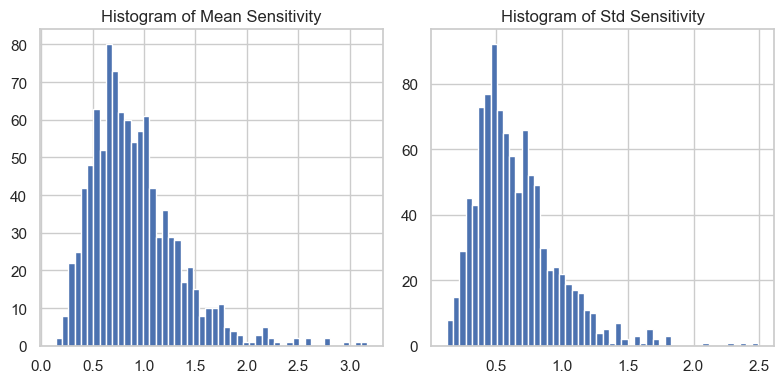

In [30]:
n_perturb = 50
eps = 1e-3
idx = np.random.randint(0, len(ffnn_X_test), 1000)

sens_mean_all = []
sens_std_all = []

for i in tqdm(idx, desc="Computing sensitivities"):
    x = np.array(ffnn_X_test.iloc[i].values, dtype="float32").reshape(1, -1)
    y0 = float(ffnn_model(x, training=False).numpy().squeeze())

    ratios = []
    for _ in range(n_perturb):
        noise = np.random.normal(0, eps, size=x.shape).astype("float32")
        y_noisy = float(ffnn_model(x + noise, training=False).numpy().squeeze())
        dy = abs(y_noisy - y0)
        norm_noise = np.linalg.norm(noise)
        ratios.append(dy / (norm_noise + 1e-12))

    sens_mean_all.append(np.mean(ratios))
    sens_std_all.append(np.std(ratios))

mean_sens_all = np.array(sens_mean_all)
std_sens_all = np.array(sens_std_all)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(sens_mean_all, bins=50)
plt.title("Histogram of Mean Sensitivity")

plt.subplot(1,2,2)
plt.hist(sens_std_all, bins=50)
plt.title("Histogram of Std Sensitivity")

plt.tight_layout()
plt.show()

✅ Verify that the SHAP values are locally stable, i.e. quantify how much a sample’s SHAP feature attributions change when the input is perturbed slightly, indicating the stability of the model’s explanations around that point.

Conclusion: The local SHAP sensitivity analysis shows that attribution values are highly stable, with both the mean and standard deviation of the SHAP L1 changes concentrated at very small magnitudes across samples. This indicates that slight perturbations of the inputs produce only minimal changes in the SHAP explanations, demonstrating that the model’s feature attributions are locally robust and not overly sensitive to small variations in the input space.

Computing local SHAP L1 change: 100%|██████████| 1000/1000 [19:32<00:00,  1.17s/it]


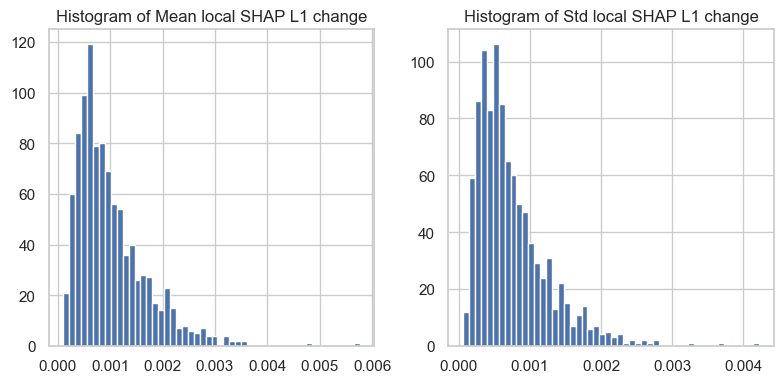

In [31]:
explainer_ffnn = shap.DeepExplainer(model=ffnn_model, data=data_background)
n_perturb=20
eps=1e-3
idx = np.random.randint(0, len(ffnn_X_test), 1000)

mean_l1_all = []
std_l1_all = []

for i in tqdm(idx, desc="Computing local SHAP L1 change"):
    x = np.array(ffnn_X_test.iloc[i].values, dtype="float32").reshape(1, -1)
    base_shap = explainer_ffnn.shap_values(x)[0][0]

    l1_changes = []
    for _ in range(n_perturb):
        noise = np.random.normal(0, eps, size=x.shape).astype("float32")
        x_noisy = x + noise
        shap_noisy = explainer_ffnn.shap_values(x_noisy)[0][0]
        l1_changes.append(np.sum(np.abs(shap_noisy - base_shap)))
    
    mean_l1_all.append(np.mean(l1_changes))
    std_l1_all.append(np.std(l1_changes))

mean_l1_all = np.array(mean_l1_all)
std_l1_all = np.array(std_l1_all)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(mean_l1_all, bins=50)
plt.title("Histogram of Mean local SHAP L1 change")

plt.subplot(1,2,2)
plt.hist(std_l1_all, bins=50)
plt.title("Histogram of Std local SHAP L1 change")

plt.tight_layout()
plt.show()

✅ Verify that the gradient norms with respect to the inputs are stable, i.e. measure the magnitude of the model’s output gradient at a given point, indicating how strongly small changes in the input can influence the prediction.

Conclusion: The gradient-norm analysis indicates stable model behaviour, with median, 90th-percentile, and 99th-percentile norms remaining low (≈0.07, 0.12, and 0.17), demonstrating that small changes in the inputs exert only modest influence on the model’s output. This suggests that the learned function is locally smooth and does not exhibit excessive sensitivity to input perturbations.

In [32]:
import tensorflow as tf

batch_size = 64
N = 1000

all_norms = []

for start in range(0, N, batch_size):
    end = start + batch_size
    X_batch = ffnn_X_test[start:end]
    X_batch = tf.convert_to_tensor(X_batch, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(X_batch)
        y = tf.reduce_mean(ffnn_model(X_batch, training=False))

    grads = tape.gradient(y, X_batch)
    norms = tf.norm(grads, axis=1).numpy()

    all_norms.append(norms)

all_norms = np.concatenate(all_norms)

print("Grad norm percentiles:", np.percentile(all_norms, [50, 90, 99]))

Grad norm percentiles: [0.06739126 0.11690118 0.1722783 ]


*SHAP Plots*

Beeswarm Plot Conclusions:

The SHAP beeswarm plot indicates that several features (e.g., BFI, v_gust, k_h, v_wind) have large and highly variable contributions to the FFNN’s predictions, with both strongly positive and negative SHAP values. This wide spread reflects substantial feature interactions and instability in the learned representation, as the same feature can either increase or decrease the prediction depending on the accompanying covariates. 

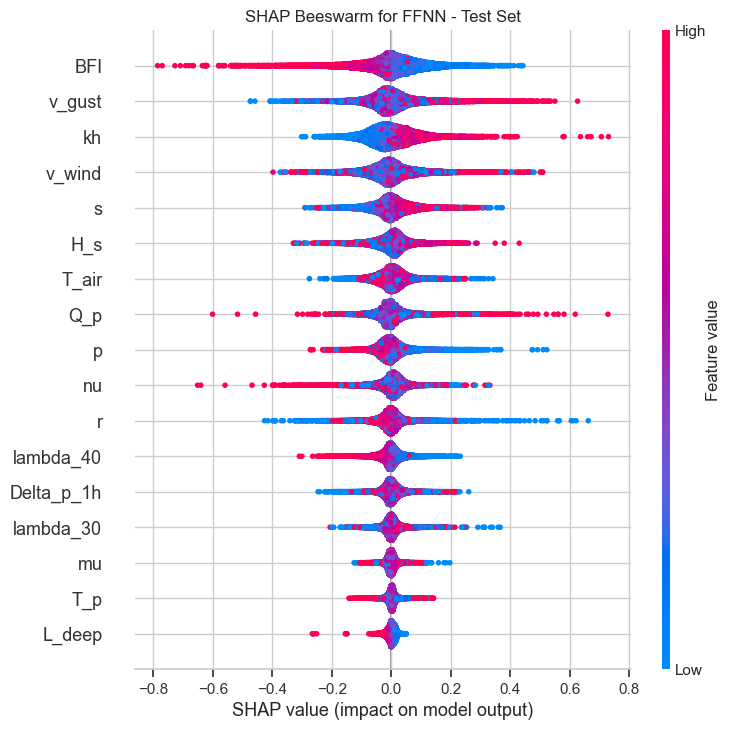

In [33]:
shap.plots.beeswarm(explanation_ffnn, max_display=17, show=False)
plt.title("SHAP Beeswarm for FFNN - Test Set")
plt.show()

Dependence Plot Conclusions:

The SHAP dependence plots reveal that the FFNN exhibits highly non-monotonic and interaction-dominated behaviour: for many features, the SHAP values span both positive and negative ranges at the same input value, producing "butterfly-shaped" patterns. This indicates that the effect of a single predictor is not stable but depends strongly on the values of other correlated covariates, consistent with substantial feature interactions and multicollinearity in the data. 

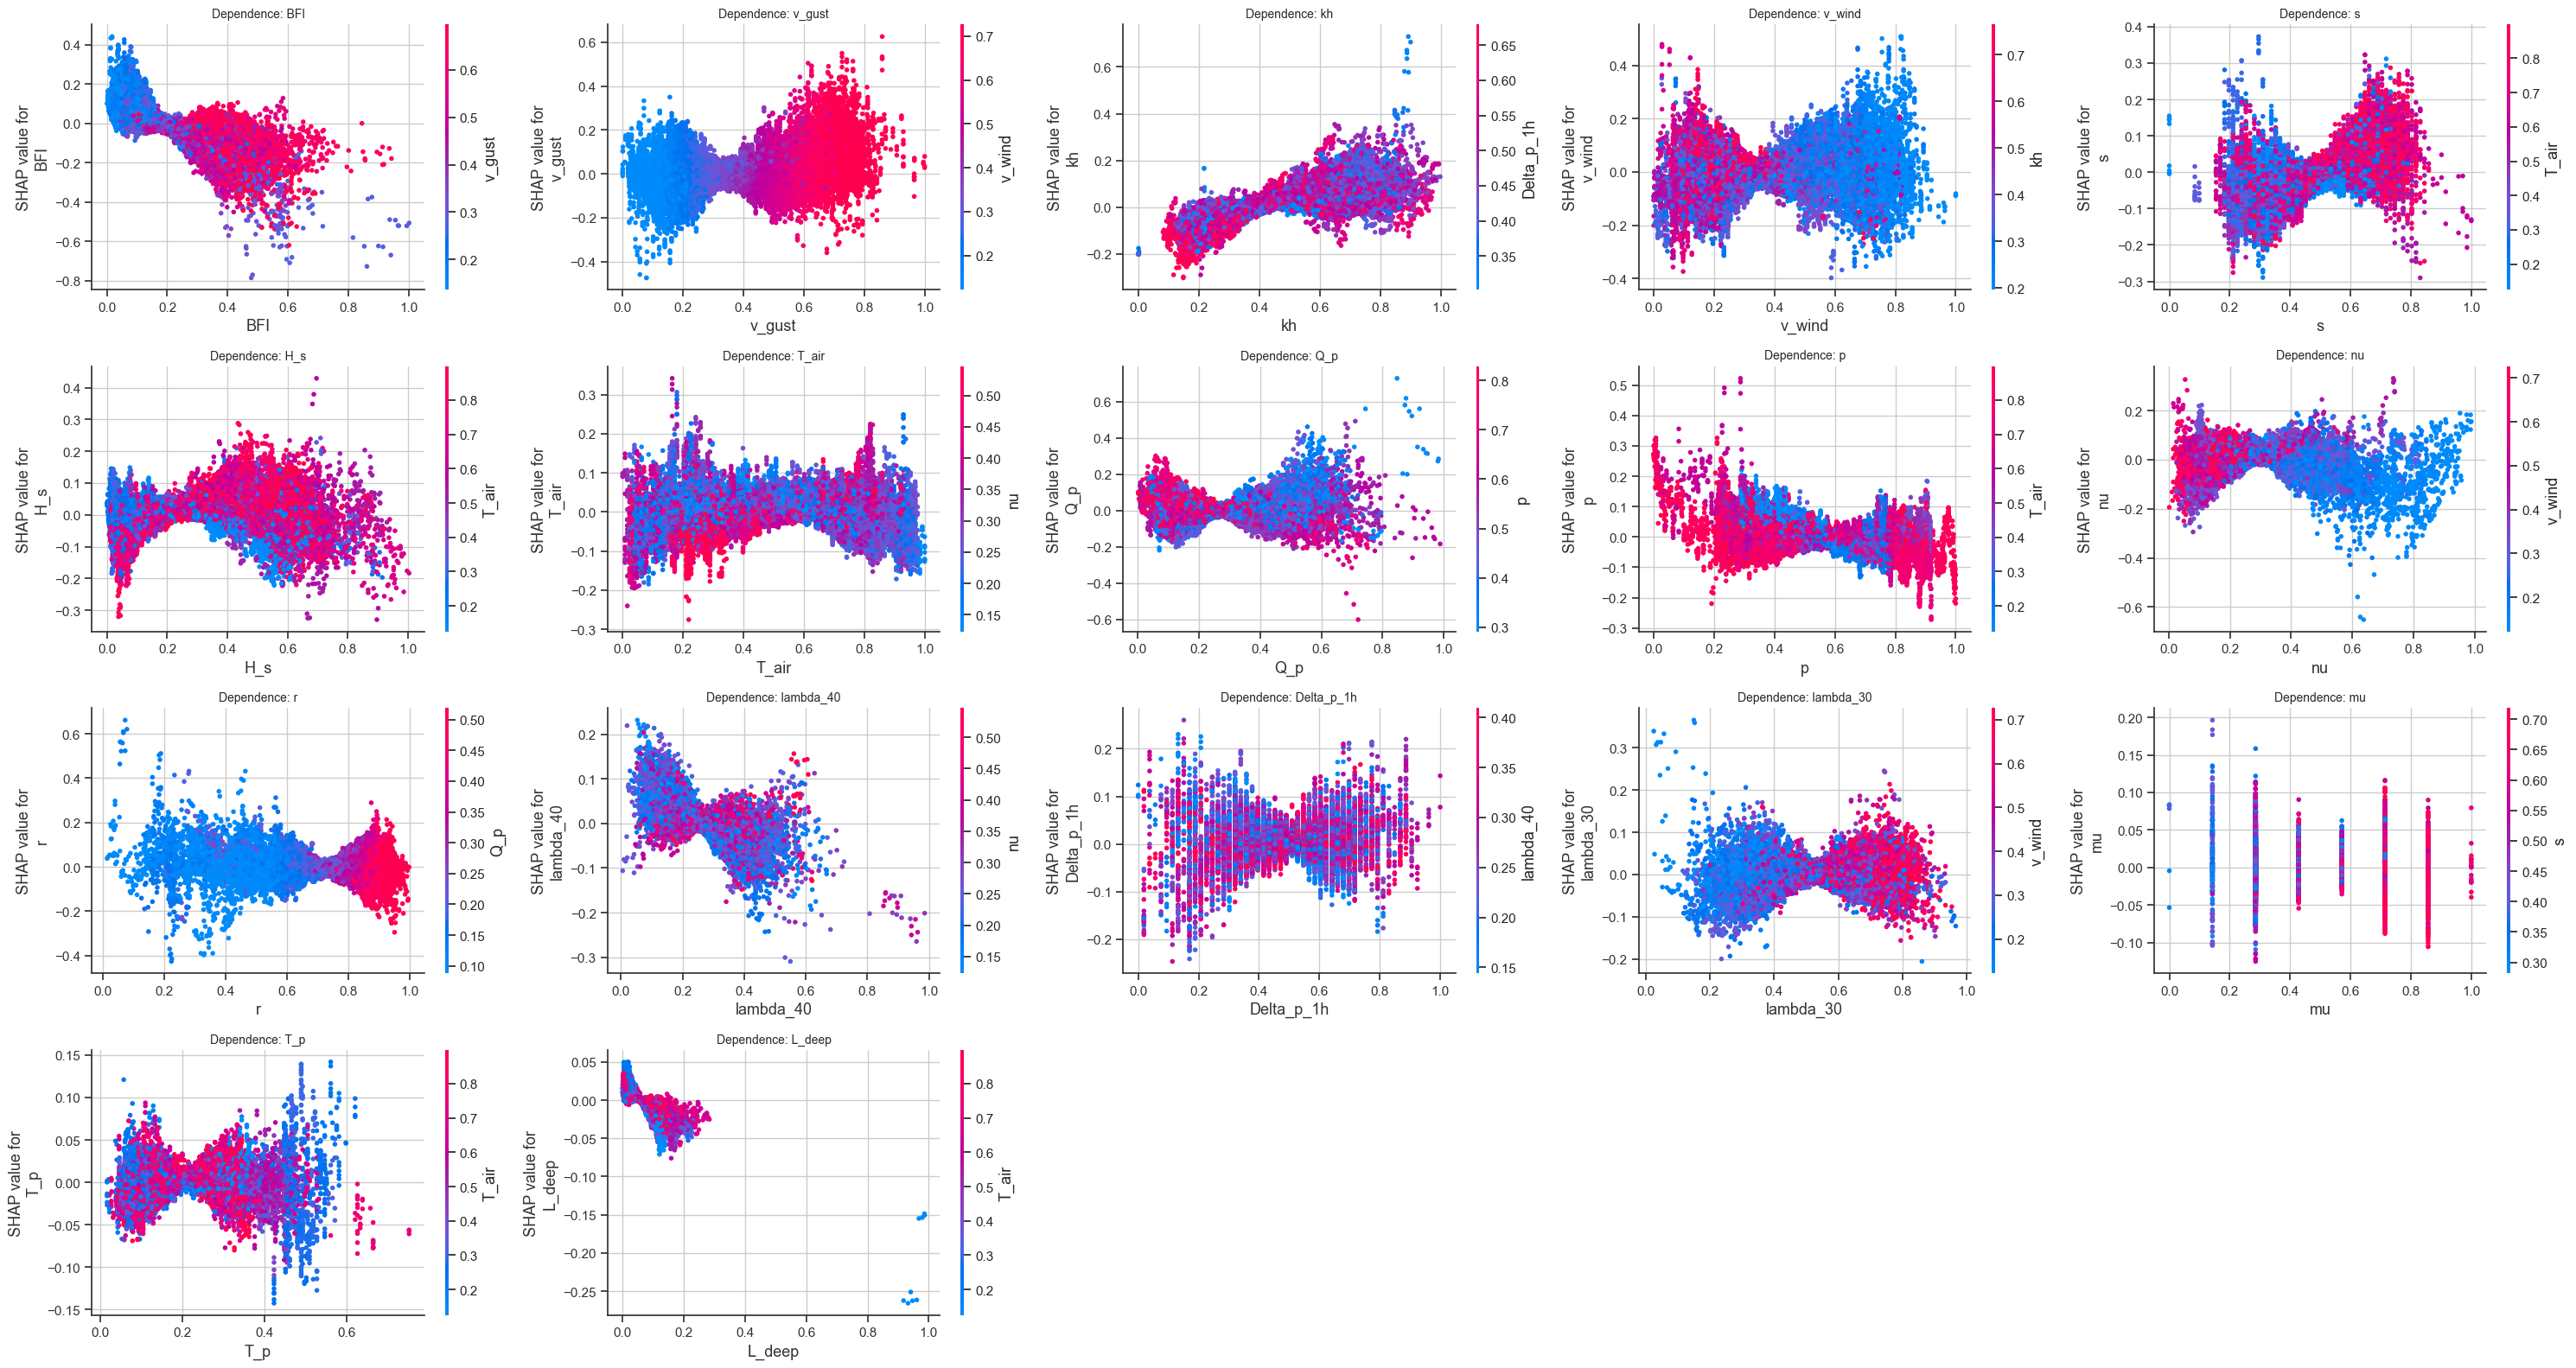

In [34]:
utils.plot_shap_dependence(explanation_ffnn, num_cols=5)

Force Plot Conclusions:

The force plots highlight a fundamental difference in how the two model classes construct their predictions.
For the FFNN, individual predictions are driven by a large number of sizable positive and negative SHAP contributions that heavily counteract one another, indicating that the network relies on a complex internal representation with substantial interaction effects and compensating feature influences. Even features with moderate values can produce disproportionately strong pushes in opposite directions, reflecting an unstable and highly entangled attribution structure.

In contrast, the XGBoost force plots show much smaller and more concentrated contributions, typically with only a few features exerting meaningful influence on the prediction and with very little cancellation between them. This reflects a more straightforward and stable decision mechanism, consistent with the model’s superior predictive performance and the inherently constrained structure of boosted trees.

Overall, the comparison suggests that the FFNN distributes predictive responsibility across many correlated features in a non-identifiable and interaction-heavy manner, whereas XGBoost learns clearer, more localized feature effects that lead to more interpretable and stable attributions.

Sample index: 17634


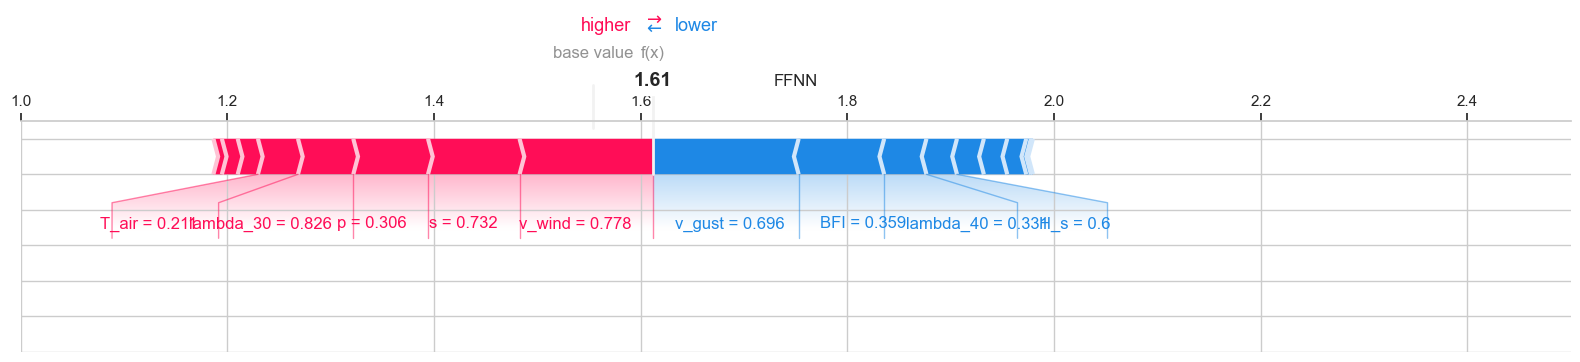

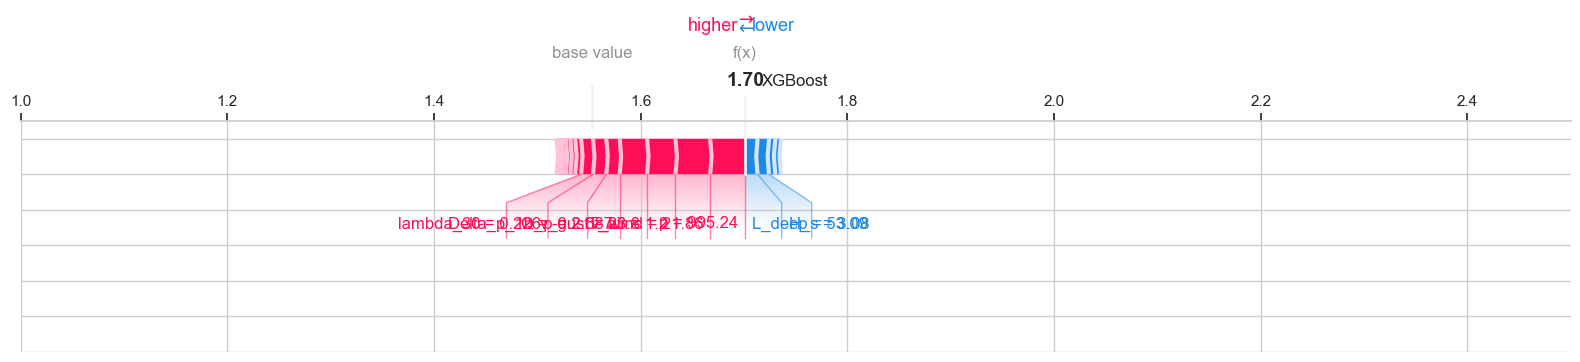

Sample index: 34661


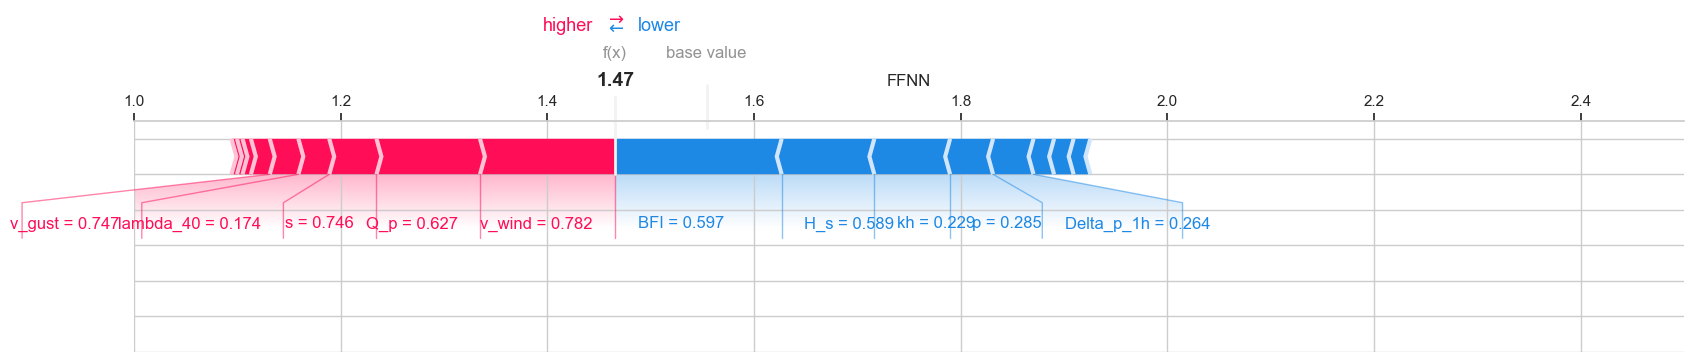

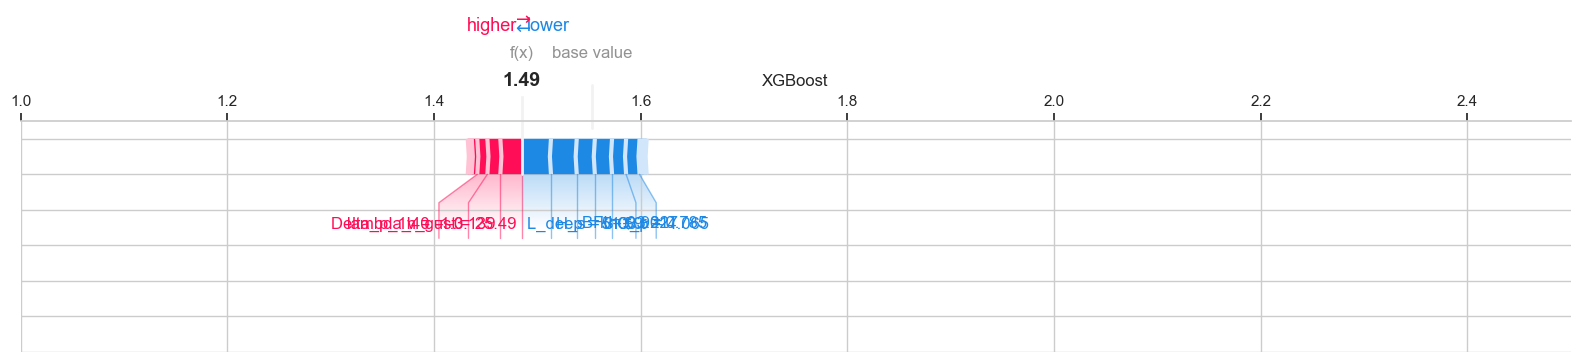

Sample index: 16352


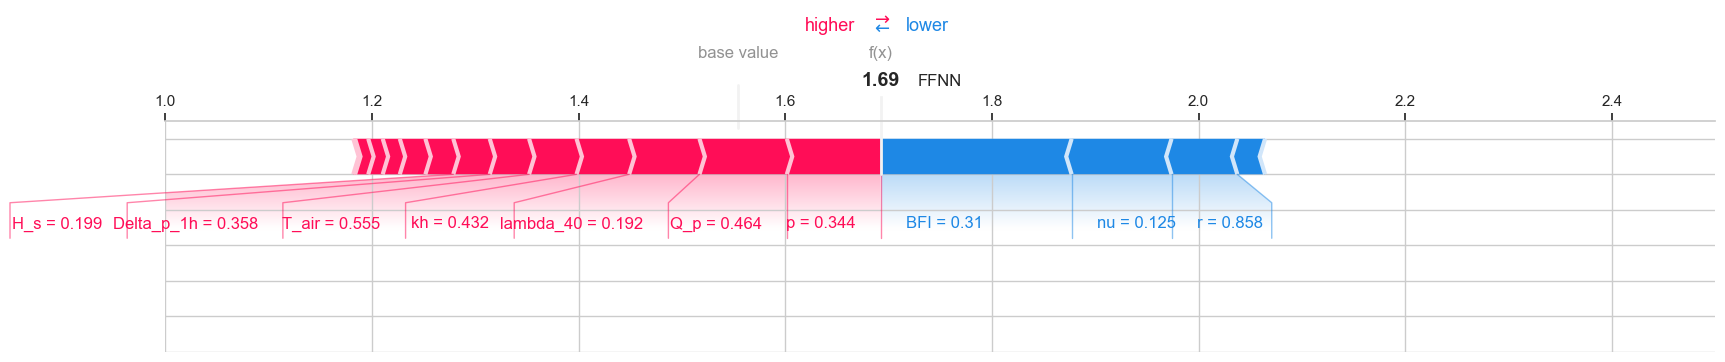

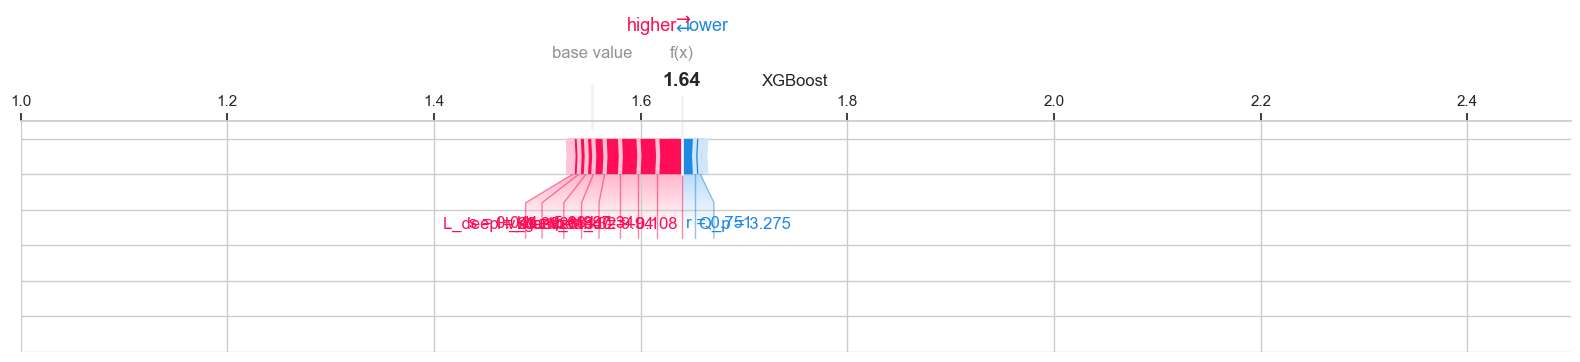

Sample index: 4427


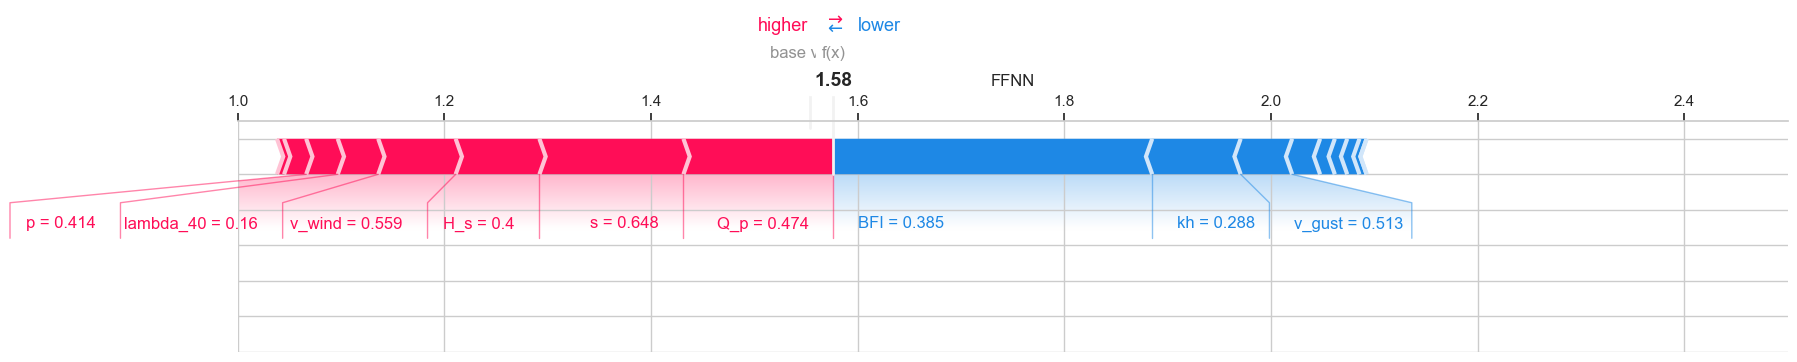

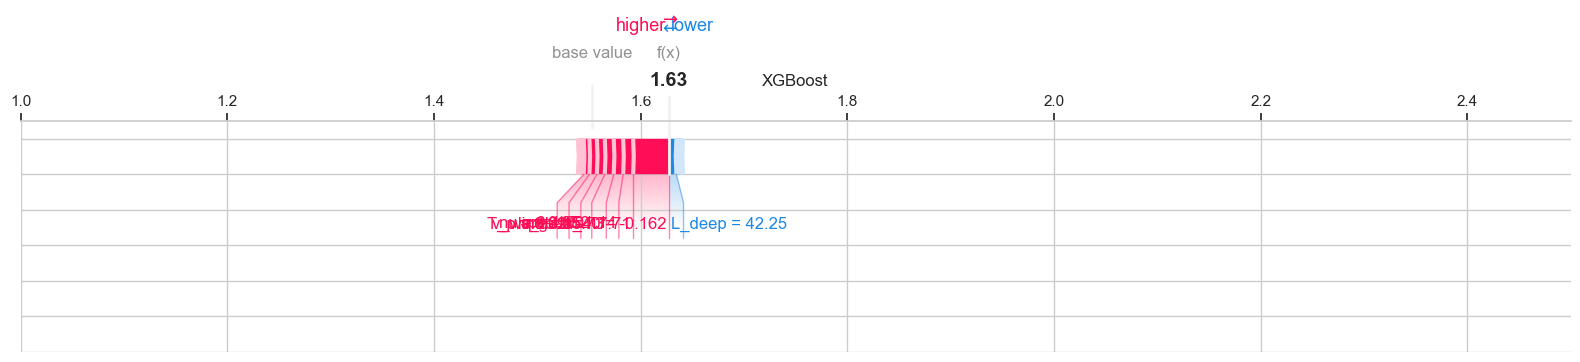

Sample index: 26764


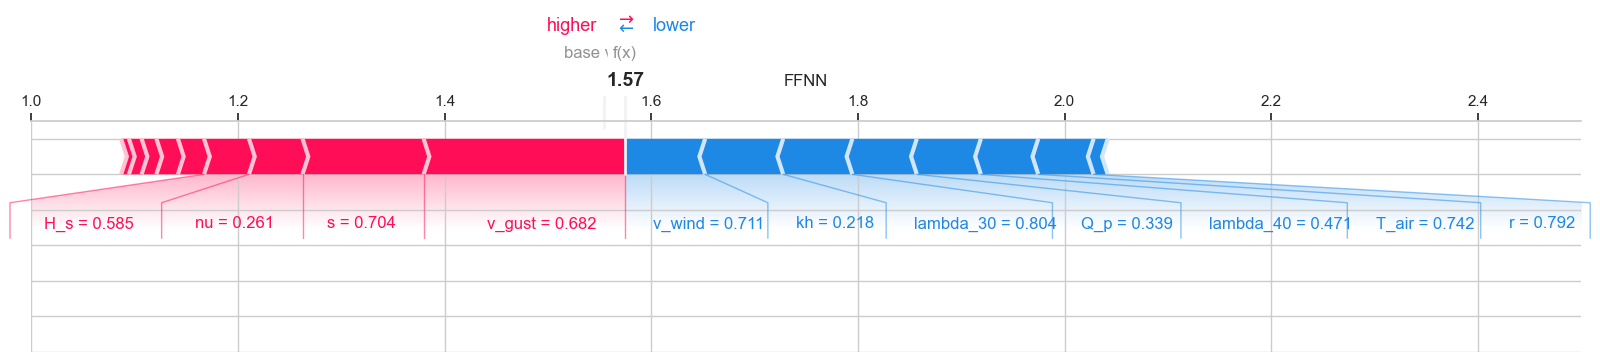

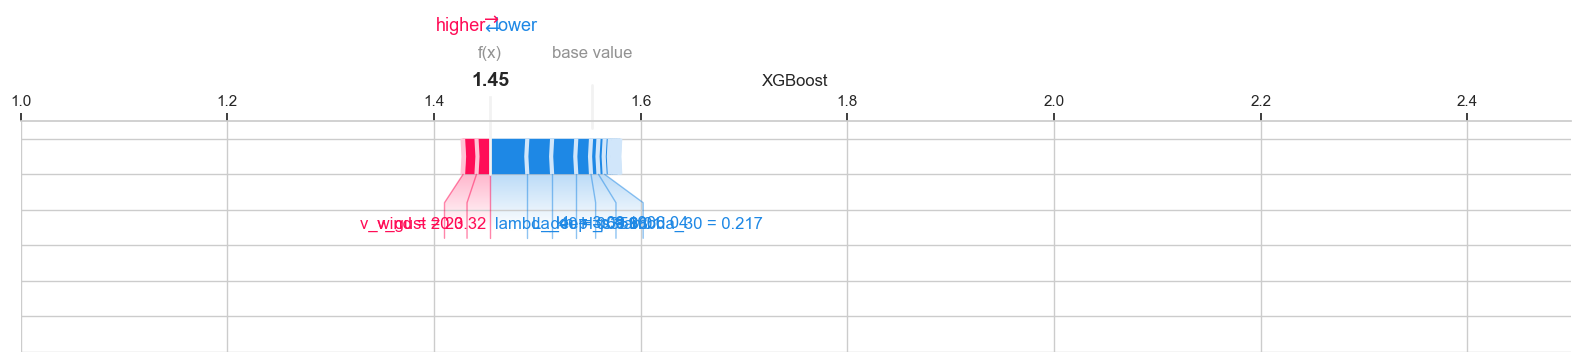

Sample index: 20241


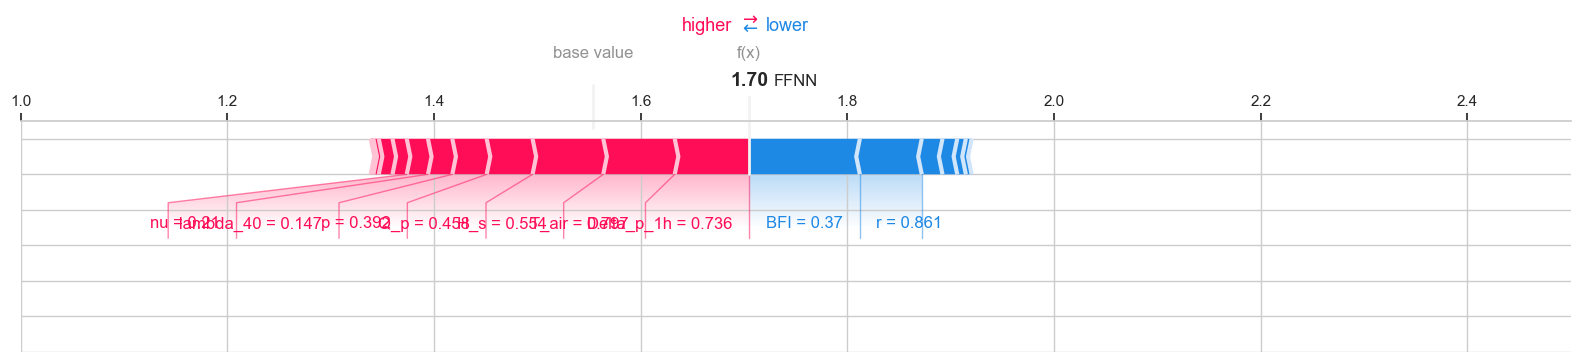

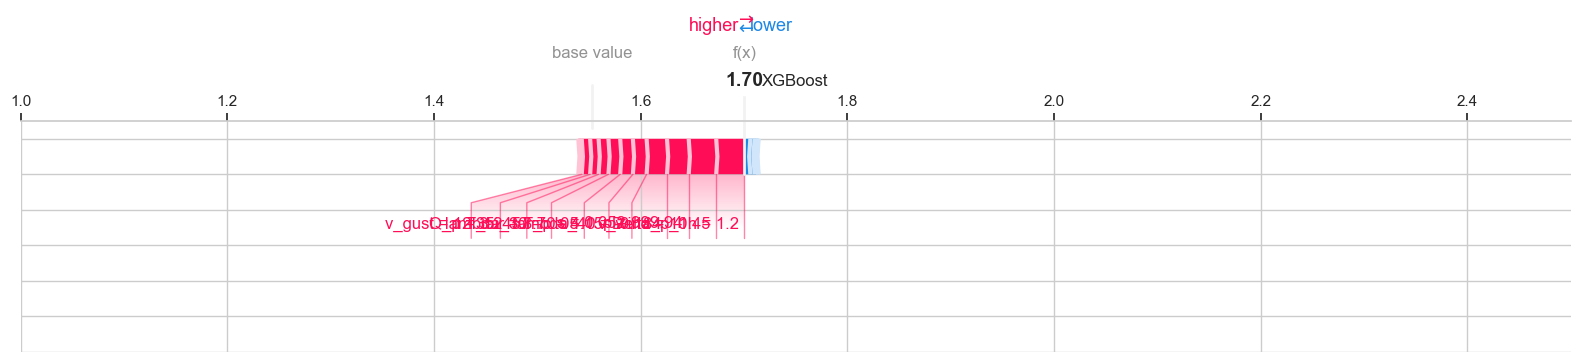

Sample index: 18513


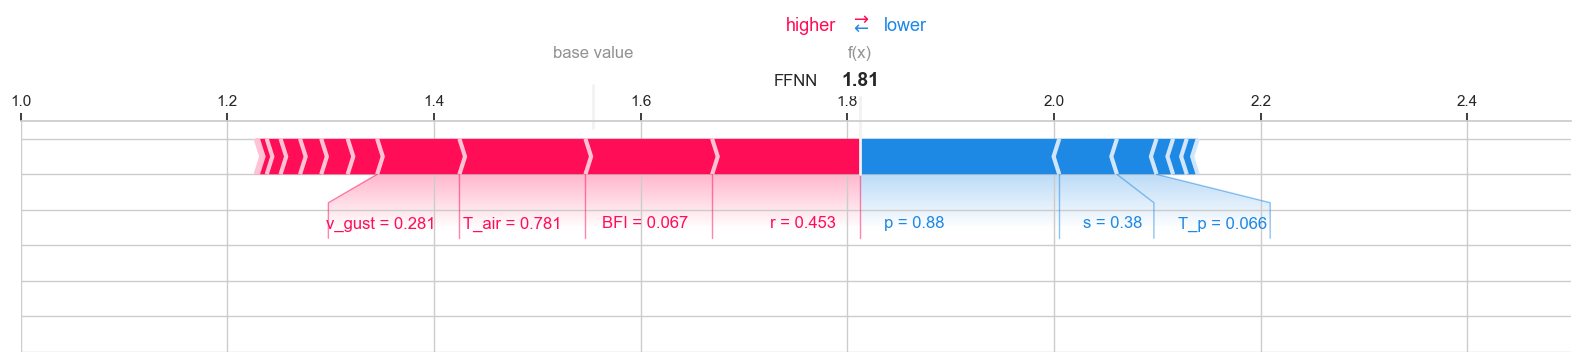

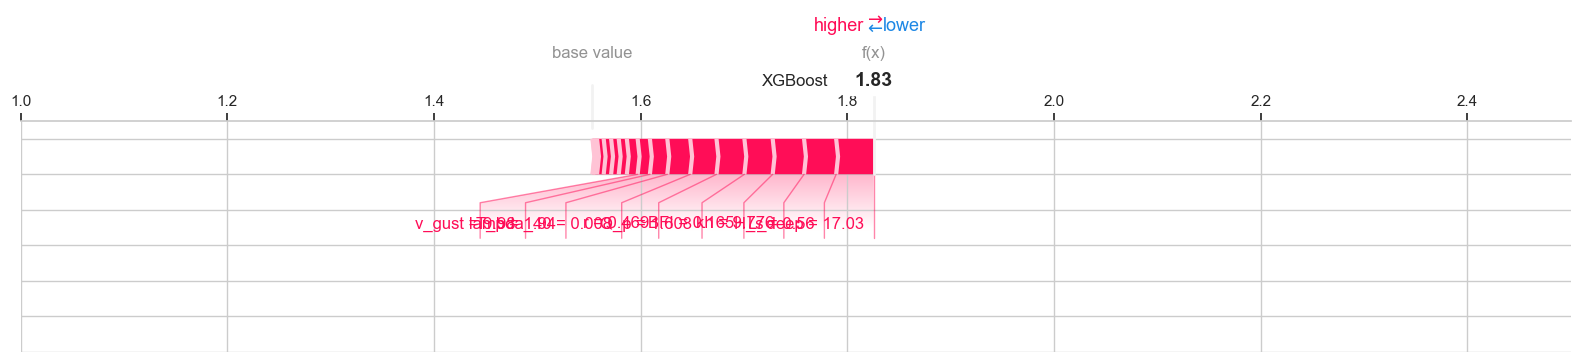

Sample index: 11658


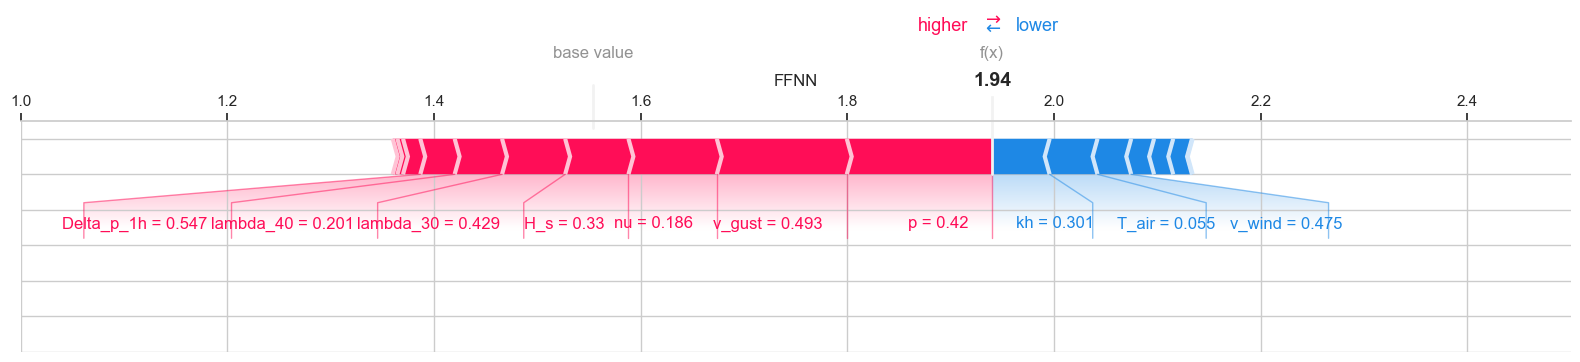

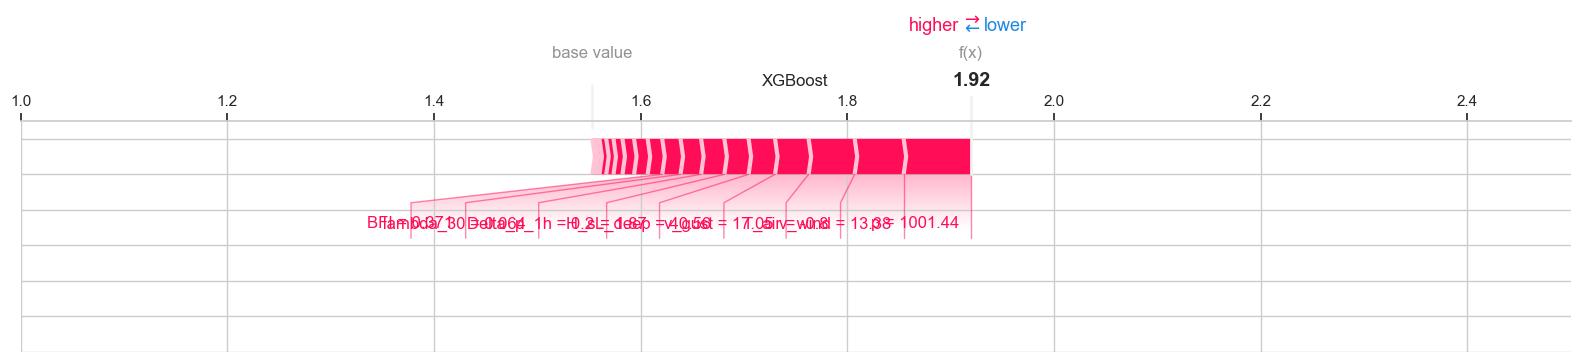

In [35]:
exp_ffnn = shap.Explanation(
    values=explanation_ffnn.values,
    base_values=explanation_ffnn.base_values,
    data=np.round(explanation_ffnn.data, 3),
    feature_names=explanation_ffnn.feature_names
)

exp_xgb = shap.Explanation(
    values=explanation_xgboost.values,
    base_values=explanation_xgboost.base_values,
    data=np.round(explanation_xgboost.data, 3),
    feature_names=explanation_xgboost.feature_names
)

idx = [17634, 34661, 16352, 4427, 26764, 20241, 18513, 11658]
# idx = np.random.randint(0, len(exp_xgb), 10)

for i in idx: 
    print(f"Sample index: {i}")

    fig = shap.plots.force(exp_ffnn[i], matplotlib=True, show=False)
    ax = plt.gca()
    ax.set_xlim(1, 2.5)   # enforce constant range
    ax.set_title("FFNN")
    plt.show()

    fig = shap.plots.force(exp_xgb[i], matplotlib=True, show=False)
    ax = plt.gca()
    ax.set_xlim(1, 2.5)   # enforce constant range
    ax.set_title("XGBoost")
    plt.show()

**Analysis of zero-inflated SVM SHAP values**

The SVM model was trained using an RBF kernel with relatively aggressive hyperparameters (C = 10, ε = 0.01, γ = 1), which encourage the model to fit the training data closely by penalising even small residuals and by allowing highly responsive local behaviour through a narrow kernel width. Despite being configured to follow the training data closely, the model nonetheless generalises well, as indicated by the small discrepancy between training and test performance. This outcome arises from the use of the RBF kernel, which produces a smooth prediction function without abrupt discontinuities despite the large number of contributing support vectors, and from the high density of the underlying dataset. With over 800,000 training waves and 359,574 support vectors, most test samples lie close to many training points, placing the SVM predominantly in an interpolation rather than extrapolation regime. Under such conditions, even highly detailed local approximations can yield stable and accurate predictions. At the same time, the margin-maximising formulation of ε-SVR continues to regularise the solution, preventing excessive curvature unless strongly supported by the data. These modelling properties explain the distinctive SHAP patterns observed for the SVM. The KernelExplainer approximates the model’s behaviour locally through a linear surrogate, and when the underlying RBF surface is locally flat, the surrogate’s coefficients become negligible, resulting in SHAP values near zero. Conversely, when the prediction is influenced by a cluster of nearby support vectors, the local surface is sharply curved and the linear surrogate produces large positive or negative SHAP values. This combination leads to the characteristic zero inflation and long tails in the beeswarm plots, while the partial dependence plots exhibit dense central clouds with occasional sharp fluctuations reflecting the highly localised sensitivity of the model.

Taken together, these observations suggest that the SVM is capable of achieving strong predictive accuracy for this dataset, but it does so by learning a detailed patchwork of local relationships rather than coherent global interactions among features. The resulting model is smooth, numerically stable, and well-calibrated within the data manifold, yet it relies on an exceptionally large number of support vectors and produces explanations that are difficult to interpret physically. While the SVM can therefore be considered appropriate for the task from a predictive standpoint, its reliance on finely tuned local structure and its limited interpretability make it less suitable for scientific interpretation.

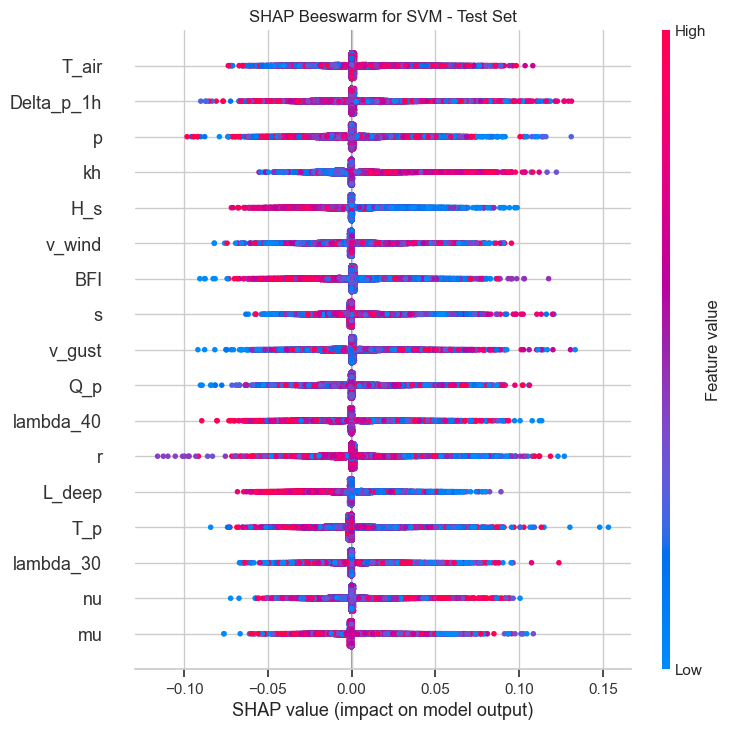

In [36]:
shap.plots.beeswarm(explanation_svm, max_display=17, show=False)
plt.title("SHAP Beeswarm for SVM - Test Set")
plt.show()

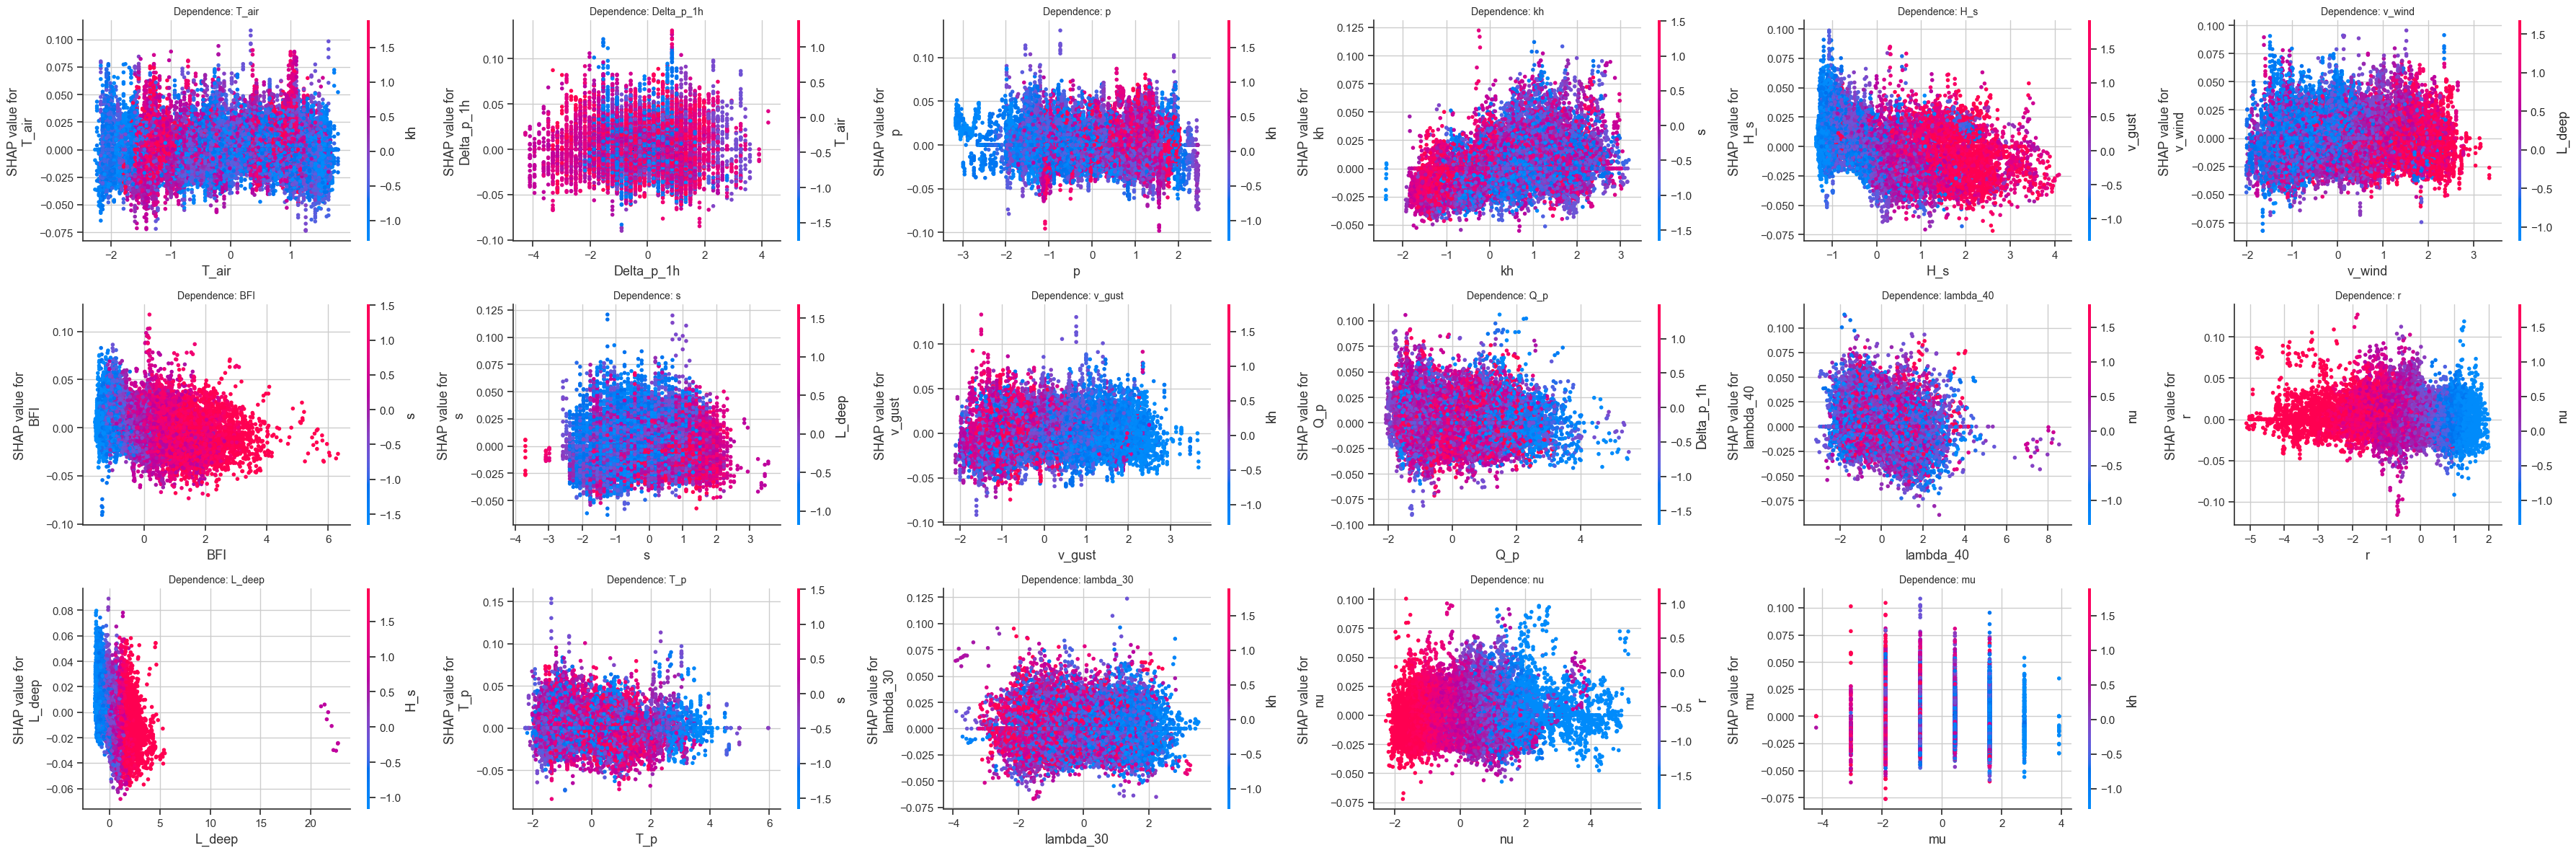

In [37]:
utils.plot_shap_dependence(explanation_svm)

**Choice of Explainers**

To ensure faithful and comparable feature attributions across the heterogeneous model classes analyzed in this study, we employed the SHAP explainer specific to each model type rather than applying the model-agnostic KernelExplainer uniformly. Although KernelExplainer provides a common framework, it relies on sampling-based approximations and an implicit feature-independence assumption when estimating the conditional expectations that underlie Shapley values. This assumption is incompatible with the substantial correlations observed in our predictor set, where many features exhibit moderate to strong linear dependencies. In such settings, KernelExplainer can yield biased and unstable attribution magnitudes because it is not able to correctly account for the joint distribution of correlated inputs. In contrast, model-specific SHAP explainers (e.g., TreeExplainer for tree ensembles, LinearExplainer for regularized linear models, and DeepExplainer for neural networks) leverage model structure to compute exact or higher-fidelity Shapley values and handle correlated inputs in a manner consistent with the underlying learning algorithm. Importantly, the interpretation of SHAP values remains identical across explainers, e.g., a SHAP value of 0.1 always represents a contribution of +0.1 to the model output relative to the baseline prediction, while the numerical accuracy and stability of these values depend strongly on the explainer used, with model-specific explainers providing substantially more reliable estimates than KernelExplainer in the presence of correlated features. Using KernelExplainer for all models would therefore introduce heterogeneous, correlation-driven distortions that reduce the interpretability and comparability of feature importance across model classes. Employing dedicated explainers alongside a consistent background dataset provides the most robust and theoretically grounded basis for comparing feature contributions across diverse models.

Using 2000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1000 [00:00<?, ?it/s]

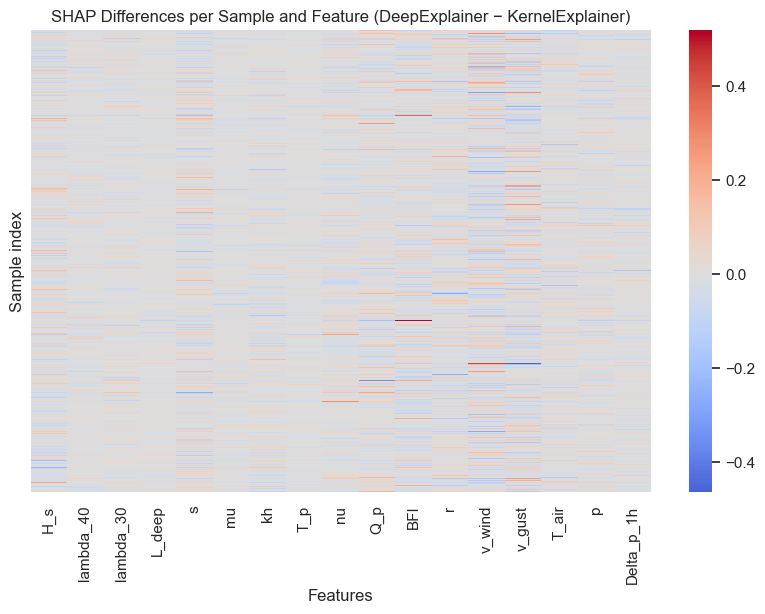

In [38]:
explainer_DE = shap.DeepExplainer(model=ffnn_model, data=data_background)

def f_predict(x):
    x = np.array(x, dtype="float32")
    preds = ffnn_model(x).numpy()
    return preds.reshape(-1)

explainer_KE = shap.KernelExplainer(model=f_predict, data=data_background)

idx = np.random.randint(0, len(ffnn_X_test), 1000)

shap_values_DE = explainer_DE.shap_values(ffnn_X_test.iloc[idx].values)
shap_values_KE = explainer_KE.shap_values(ffnn_X_test.iloc[idx].values, nsamples=100)

shap_DE = np.array(shap_values_DE).squeeze(-1)  
shap_KE = np.array(shap_values_KE)      
diff = shap_DE - shap_KE  

plt.figure(figsize=(10, 6))

sns.heatmap(
    diff,                       
    xticklabels=ffnn_X_test.columns,
    yticklabels="",
    cmap="coolwarm",
    center=0
)

plt.xlabel("Features")
plt.ylabel("Sample index")
plt.title("SHAP Differences per Sample and Feature (DeepExplainer − KernelExplainer)")
plt.show()

Conclusion on the comparison between KernelExplainer and DeepExplainer

The comparison between KernelExplainer and DeepExplainer shows that the SHAP values produced by the two methods are broadly consistent across samples and features, with differences generally small in magnitude and centered around zero. The residual variation observed in the heatmap consists primarily of low-intensity fluctuations without systematic structure, indicating that both explainers attribute feature contributions in a similar manner despite their different underlying approximation strategies.

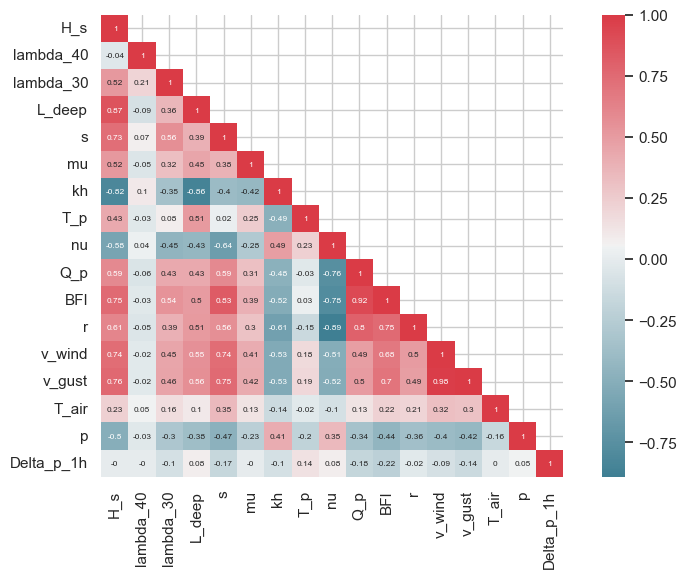

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

corr = ffnn_X_test.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

ax_heat = sns.heatmap(
    corr.round(2),
    mask=mask,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    ax=ax,
    annot=True,
    annot_kws={"size": 6},
)

plt.show()